## Introduction

This is a pretty big notebook. You'll find the lab questions all at the very end. There are 6 questions, and an additional 3 challenge questions.

---

# Part 1

### Recap: Bayes Theorem

Bayes' theorem is a fundamental tool in probability theory and statistics that describes the probability of an event based on prior knowledge of conditions that might be related to the event. It is named after Thomas Bayes, who first developed the foundational approach. The theorem provides the mathematically optimal estimates of probabities of outcomes from data (or hypotheses from evidence, such as 'has disease' given 'positive test', or 'phoneme /k/ was spoken' given some speech input [as evidence]).

The theorem is usually stated as follows:

$$
P(Hypothesis | Evidence) = \frac{P(Evidence | Hypothesis) \times P(Hypothesis)}{P(Evidence)}
$$


Where:

- $P(Hypothesis | Evidence)$ is the **posterior probability**: the probability of the hypothesis being true, given the observed evidence.
- $P(Evidence | Hypothesis)$ is the **likelihood**: the probability of observing the evidence, given that the hypothesis is true.
- $P(Hypothesis)$ is the **prior probability**: the initial probability of the hypothesis, before observing any evidence. When we talked about Bayes' Theorem in the context of statistical reasoning studies, we called this the *base rate* (the probability of the outcome, e.g., the probability that someone in a given population is infected with a particular disease). This is appropriate when we are talking about something like the prevalence of a disease. *Prior probability* is more general. 
- $P(Evidence)$ is the **marginal likelihood**: the total probability of observing the evidence under all possible hypotheses.

Again, the $Hypothesis$ is the outcome under consideration: has the disease, is the phoneme that was said, is the word that was said, etc.

The $Evidence$ is the data or input: result of a medical test, the speech input, etc.

---


## Hypotheses

What are **hypotheses** in the context of Bayes' Theorem? We talked about them as *outcomes* when we talked about statistical reasoning in class. For statistical reasoning questions, we might ask a seemingly simple question like 'what is the probability of having a disease given a positive test for the disease?' This is a case where we have only 2 possible hypotheses: has the disease or does not have the disease, which we might denote as $D$ vs. $\neg{D}$ (D or not D). We also only consider 2 possible evidence states: positive test or negative test. This is a case we can depict with a simple diagram. 

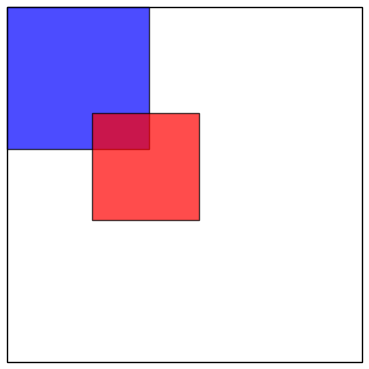

In [1]:
# play this cell to see the next image
from IPython.display import Image
Image(filename='rectangles_diagram01.png') 

In this diagram, the white rectangle represents the full population. The blue rectangle represents individuals with the disease. The red rectangle represents people who test positive, whether they have the disease or not. The part of the red triangle that overlaps with the blue triangle would be true positives: people who have the disease **and** test positive. The rest of the red rectangle represents false positives: people who do **not** have the disease but test positive. The probability of having the disease given a positive test is the the proportion of the red rectangle that overalaps with the blue rectangle -- that is, the proportion of positive tests that are true positives. 

Recall that to calculate this with Bayes' Theorem, we need to know the *base rate* (likelihood of the hypothesis or outcome, that is, having the disease), the hit rate (probability of a positive test when you have the disease), and the fale alarm rate (probability of having a positive test when you do not have the disease. To calculate it, suppose the probability of having the disease is 0.12, the hit rate is 0.1, and the false alarm rate is 0.15. The numerator in the formula is ${P(Evidence | Hypothesis) \times P(Hypothesis)}$. This is the hit rate (probability of a positive test if you have the disease) multiplied by the base rate. That would give us an answer corresponding to the portion of the red rectangle that overlaps with the blue rectangle. Note that this is the probability that both *having the disease* **and** *having a positive test* are true. The denominator is $P(Evidence)$. What is that? That's the probability of a positive test, which would correspond to the entire red rectangle. The numerator already captures the part overlapping with the blue rectangle, so now we need to figure out how big the rest of the red triangle is. 

Well, we figured out how big the overlap part was by multiplying the hit rate by the base rate (represented by the blue rectangle). Now we need to multiply the false alarm rate by the size of the white rectangle that does not overlap with the blue one. Those two cannot overlap -- they divide the population into has disease and does not have the disease, so the size of the 'rest' of the population without the disease is 1 - base rate, or 0.88 in our example. So we would multiply 0.88 by 0.15 (false alarm rate). That gives us the rest of the red rectangle. As a formula, we would have: $P(Evidence|\neg{Hypothesis}) \times P(\neg{Hypothesis})$, where $\neg$ is the 'not' symbol. Note that this is the probability that both *not having the disease* **and** *having a positive test* are true. We can add the two results to give us $P(Evidence)$:

$$P(Evidence) = [P(Evidence|Hypothesis) \times P(Hypothesis)] + [P(Evidence|\neg{Hypothesis}) \times P(\neg{Hypothesis})]$$ 

Do you see a pattern here? For each possible hypothesis (here, $Hypothesis$ or $\neg{Hypothesis}$), we multiply the probability of the evidence given the hypothesis by the probability of the hypothesis. 

Let's consider what would happen with a slightly more complex case: let's suppose that coughing is also associated with the disease. We can depict this by adding another rectangle to our diagram:

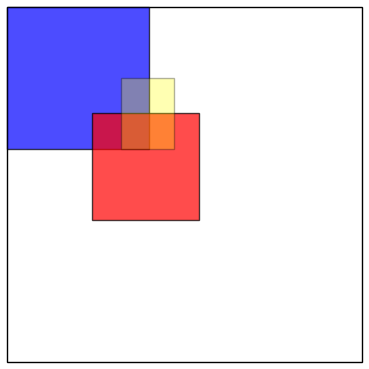

In [2]:
# play this cell to see the next image
Image(filename='rectangles_diagram02.png') 

The yellow rectangle represents having a cough. Now we can ask how likely it is that a patient has the disease if they are coughing, or, more usefully, if a patient is more likely to have the disease if they are coughing **and** have a positive test. 

Now how would we determine the probability that someone has the disease given both sources of evidence? We will tackle this formally in the next section, but for now, consider how you could conceptually use the rectangles to work out a solution. In the previous schematic, remember that the probability of having the disease given a positive test would be related to the ratio of the size of the red rectangle overlapping with the blue rectangle to the total size of the red rectangle. Now with the yellow rectangle, there are 8 possible states (2 x 2 x 2, from 2 outcomes or hypotheses [have disease, no disease] x 2 possibilites with respect to the test [positive, negative] x 2 possibilities with the symptom of coughing [cough, no cough]): 

1. Have disease, negative test, no cough (only blue)
1. Have disease, positive test, no cough (the portion of the red square that only overlaps with blue)
1. Have disease, negative test, have cough (only blue and yellow overlap)
1. Have disease, positive test, have cough (blue, red, and yellow overlap)
1. No disease, negative test, no cough (white only)
1. No disease, positive test, no cough (red only)
1. No disease, negative test, have cough (yellow only)
1. No disease, positive test, cough (red and yellow)

What ratios would be useful for evaluating the probability of disease given (a) cough but negative test, (b) no cough but positive test, (c) positive test and has cough?

-------

# Part 2

## Extending Bayes' theorem to multiple sources of evidence

Let's apply **Bayes' theorem** to a case with two hypotheses and two sources of evidence. Let's also move toward a more general notation, where we will enumerate $n$ hypotheses 1 to $n$ as $H_1$, $H_2$, $\ldots H_n$, and $m$ sources of evidence 1 to $m$ as $E_1$, $E_2$, $\ldots E_m$

### Scenario

Let's say we have two hypotheses ($H_1$, $H_2$) and two sources of evidence ($E_1$, $E_2$). 

1. **Hypotheses**:
    - $ H_1 $: The person has the disease.
    - $ H_2 $: The person does not have the disease.

2. **Evidence**:
    - $ E_1 $: The test result is positive.
    - $ E_2 $: The person is coughing.

#### Prior Probabilities:
In more complex cases, we need to know or estimate these for all hypotheses under consideration. For a binary case, it is straightforward.

- $ P(H_1) $: The prior probability that the person has the disease.
- $ P(H_2) = 1 - P(H_1) $: The prior probability that the person does not have the disease. (We can subtract $P(H_1)$ from 1 because there are only 2 possible hypotheses, and their summed probability must equal 1. This prior would be useful if we ask what is the probability of *not* having the disease given a positive or negative test.)

#### Likelihoods (probability of evidence given the hypotheses):
- $ P(E_1 \mid H_1) $: Probability of a positive test if the person has the disease (true positives).
- $ P(E_1 \mid H_2) $: Probability of a positive test if the person does not have the disease (false positives).
- $ P(E_2 \mid H_1) $: Probability of coughing if the person has the disease (true positives -- for coughing).
- $ P(E_2 \mid H_2) $: Probability of coughing if the person does not have the disease (false positives -- for coughing).

<!---
#### Probability of the evidence
The denominator for our conditional probabilities will be $P(E)$, where we sum up the relevant evidence. Conceptually, with Bayes' Theorem, when we are asking what is the conditional probabiity of $H$ given $E$, where $E$ may be the joint probability of 2 or more kinds of evidence, we are asking what 
--->

### Generalizing Bayes' Theorem

To compute the probability that a person has the disease given a positive test result and coughing, we again use Bayes' theorem, extended to 2 sources of evidence. Let's introduce a new convention, where we will specify "$E_1, E_2$" to mean the joint probability of $E_1$ and $E_2$, i.e., the probability of $E_1$ **and** $E_2$, i.e., that both are true:

$$
P(H_1 \mid E_1, E_2) = \frac{P(E_1, E_2 \mid H_1) P(H_1)}{P(E_1, E_2)}
$$

So we read this as "the probability of $H_1$ *given* the joint probability of $E_1$ and $E_2$ is equal to the joint probability of $E_1$ and $E_2$ multiplied by the probablility of $H_1$ -- over the probability of the relevant evidence. The relevant evidence is the joint probability of $E_1$ *and* $E_2$. 

How do we get the values we need for this? First, the numerator, $ P(E_1, E_2 \mid H_1)$,  is the product of the probabilities of each piece of evidence given the hypothesis:

$$
P(E_1, E_2 \mid H_1) = P(E_1 \mid H_1) P(E_2 \mid H_1)
$$

<!---
Similarly, the posterior probability for $ H_2 $ (the person does not have the disease) is:

$$
P(H_2 \mid E_1, E_2) = \frac{P(E_1, E_2 \mid H_2) P(H_2)}{P(E_1, E_2)}
$$
--->

The denominator is the total probability of the evidence, calculated as:

$$
P(E_1, E_2) = P(E_1, E_2 \mid H_1) P(H_1) + P(E_1, E_2 \mid H_2) P(H_2)
$$

### Extension to many sources of evidence

We can extend this to arbitrarily many sources of evidence ($E_1 \ldots E_n$, where $n$ is the nubmer of evidence sources) with a little rewriting: 


$$
P(H_1 \mid E_1, \ldots E_n) = \frac{P(E_1, \ldots E_n \mid H_1) P(H_1)}{P(E_1, \ldots E_n)}
$$

## Example

Let’s consider an example with some specific values:

- $ P(H_1) = 0.01 $ (1% of people have the disease)
- $ P(E_1 \mid H_1) = 0.95 $ (95% hit rate)
- $ P(E_1 \mid H_2) = 0.05 $ (5% false-positive rate)
- $ P(E_2 \mid H_1) = 0.8 $ (80% of people with the disease cough)
- $ P(E_2 \mid H_2) = 0.1 $ (10% of people without the disease cough)

To find the posterior probability that the person has the disease given that they tested positive and are coughing:

**1. **Numerator** for $ P(H_1 \mid E_1, E_2) $:**

$$
P(E_1, E_2 \mid H_1) P(H_1) = (0.95 \times 0.8) \times 0.01 = 0.0076
$$

**2. **Denominator**:**

- For $ H_1 $: $ P(E_1, E_2 \mid H_1) P(H_1) = 0.0076 $
- For $ H_2 $: $ P(E_1, E_2 \mid H_2) P(H_2) = (0.05 \times 0.1) \times 0.99 = 0.00495 $

So:

$$
P(E_1, E_2) = 0.0076 + 0.00495 = 0.01255
$$

**3. Posterior Probability:**

$$
P(H_1 \mid E_1, E_2) = \frac{0.0076}{0.01255} \approx 0.605
$$

Thus, there is about a 60.5% chance that the person has the disease given both the positive test result and that they are coughing.

Of course, calculating this by hand would be very tedious. We could write code to do this for arbitrarily many hypotheses and evidence sources. *Possibly to be added later.*


-------

# Part 3

### Extending to many sources of non-discrete evidence

So far we have discussed cases where we have binary sources of evidence: test is positive or negative, a person has a cough or does not. What if we have many sources of evidence? For example, for speech sounds, linguists developed sets of binary features that characterize phonemes. The phoneme /p/, for example, has the features +stop, +bilabial, -alveolar, -voiced, -sonorant, -continuant (among many others). The phoneme /b/ has all of the same feature values as /p/ *except* it is +voiced. We could convert the +/- notation to a set of values of 1 (has feature) or 0 (does not have feature). So for the 6 features we have so far, pattern for /p/ would be 110**0**00 while the pattern for /b/ would be 110**1**00. We can see that the two vectors are similar, especially if we compare them to the pattern for /s/: -stop, -bilabial, +alveolar, -voiced, -sonorant, +continuant, or 001001. We can compare vectors by doing something like computing a distance between them. For **Euclidean distance**, we are computing the length of a straight line in $n-$dimensional space that goes from the 'address' of one vector to the address of another. This is easy to visualize in 2 or 3 dimensions, and the math extends to many dimensions. 

Another metric that is often used is **cosine similarity**. Recall that the cosine in trigonometry is, for a right angle, the ratio of the length of the adjacent side to the length of the hypotenuse. When the adjacent side is shorter than the hypotenuse, cosine is less than 1. When the adjacent side is longer than the hypotenuse, the cosine is greater than 1. This provides a tool that's helpful for simplifying measurements involving angles, with many interesting and powerful extensions in math and physics. 

For example, cosine can be extended to vectors, which is what we are interested in. Time for a tangent (no pun intended)...



#### Vector cosine (cosine similarity)

First, let's be precise about what a **vector** is. We can think of it just as a series of numbers, but we can do more interesting things when we think of each element in a vector as a *dimension*. Then we can think of a vector as having both **direction** and **magnitude** (or length). Imagine an arrow pointing somewhere. The length of the arrow is the magnitude, and the direction it points (relative to its originating point) is, well, the direction.

For example, in 2D space, a vector might look like this: $ \mathbf{v} = (x_1, y_1) $, where $x_1$ and $y_1$ are the coordinates. So if $x_1$ is 3 and $y_1$ is 4, we move out 3 units on the x axis from 0 and then up 4 units on the y axis from 0, and then we consider the vector to describe the straight line that would go from 0,0 to 3,4. It has an angle relative to the x and y axes (which specifies the direction it points) and a length (which is how far it extends along that angle).

Now, **cosine similarity** is a way to measure how similar two vectors are in terms of their direction (*not in terms of length at all*). The more two vectors point in the same direction, the closer their cosine similarity is to 1. If they point in opposite directions, the cosine similarity will be closer to -1. If they are at a 90-degree angle (perpendicular), the cosine similarity will be 0.

#### Math behind vector cosine

*Note: you can skip the math -- it's not crucial. The crucial part is conceptually what vector cosine tells us, which I describe after the math.*


The cosine of the angle between two vectors, $ \mathbf{v} $ and $ \mathbf{w} $, is calculated using this formula:

$$
\cos(\theta) = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{v}\| \|\mathbf{w}\|}
$$

Here’s what this means:
- $ \mathbf{v} \cdot \mathbf{w} $ is the **dot product** of the two vectors. This is a special way to multiply vectors, where you multiply their corresponding parts and add them up. If $ \mathbf{v} = (x_1, y_1) $ and $ \mathbf{w} = (x_2, y_2) $, the dot product is:

  $$
  \mathbf{v} \cdot \mathbf{w} = x_1 \cdot x_2 + y_1 \cdot y_2
  $$

- $ \|\mathbf{v}\| $ and $ \|\mathbf{w}\| $ are the **magnitudes** (or lengths) of the vectors. To find the magnitude of a vector $ \mathbf{v} = (x_1, y_1) $, we use:

  $$
  \|\mathbf{v}\| = \sqrt{x_1^2 + y_1^2}
  $$

So, the formula for cosine similarity gives you a value between -1 and 1 that tells you how much the two vectors are pointing in the same direction.

#### Example with 3 vectors

Let’s say you have 3 vectors:

$$
\mathbf{v} = (1, 2), \quad \mathbf{w} = (2, 4), \quad \mathbf{u} = (3, 1)
$$

**1. Cosine Similarity Between $ \mathbf{v} $ and $ \mathbf{w} $**

First, we find the dot product of $ \mathbf{v} $ and $ \mathbf{w} $:

$$
\mathbf{v} \cdot \mathbf{w} = 1 \cdot 2 + 2 \cdot 4 = 2 + 8 = 10
$$

Next, we find the magnitudes of each vector:

$$
\|\mathbf{v}\| = \sqrt{1^2 + 2^2} = \sqrt{1 + 4} = \sqrt{5}
$$
$$
\|\mathbf{w}\| = \sqrt{2^2 + 4^2} = \sqrt{4 + 16} = \sqrt{20}
$$

Now we can calculate the cosine similarity:

$$
\cos(\theta_{\mathbf{v}, \mathbf{w}}) = \frac{10}{\sqrt{5} \times \sqrt{20}} = \frac{10}{\sqrt{100}} = \frac{10}{10} = 1
$$

Since the cosine is 1, these two vectors are pointing in exactly the same direction (we'll plot them below).

**2. Cosine Similarity Between $ \mathbf{v} $ and $ \mathbf{u} $**

Now, let’s calculate the cosine similarity between $ \mathbf{v} $ and $ \mathbf{u} $.

First, we compute the dot product:

$$
\mathbf{v} \cdot \mathbf{u} = 1 \cdot 3 + 2 \cdot 1 = 3 + 2 = 5
$$

Next, we find the magnitude of $ \mathbf{u} $:

$$
\|\mathbf{u}\| = \sqrt{3^2 + 1^2} = \sqrt{9 + 1} = \sqrt{10}
$$

Now, we calculate the cosine similarity, using the magnitude of $\mathbf{v}$ from before:

$$
\cos(\theta_{\mathbf{v}, \mathbf{u}}) = \frac{5}{\sqrt{5} \times \sqrt{10}} = \frac{5}{\sqrt{50}} = \frac{5}{7.07} \approx 0.707
$$

Since the cosine is less than 1, the vectors $ \mathbf{v} $ and $ \mathbf{u} $ are not pointing in the same direction but are not extremely different. 

**3. Cosine Similarity Between $ \mathbf{w} $ and $ \mathbf{u} $**

Last, let’s calculate the cosine similarity between $ \mathbf{w} $ and $ \mathbf{u} $. Can you predict what the outcome will be?

First, we compute the dot product:

$$
\mathbf{w} \cdot \mathbf{u} = 2 \cdot 3 + 4 \cdot 1 = 6 + 4 = 10
$$

Now, we calculate the cosine similarity:

$$
\cos(\theta_{\mathbf{w}, \mathbf{u}}) = \frac{10}{\sqrt{20} \times \sqrt{10}} = \frac{10}{\sqrt{200}} = \frac{10}{14.14} \approx 0.707
$$

This is the same result as between $ \mathbf{v} $ and $ \mathbf{u} $, indicating that $ \mathbf{w} $ and $ \mathbf{u} $ also form about a 45-degree angle between them. We could have predicted this since we already knew that the cosine for $ \mathbf{v} $ and $ \mathbf{w} $ was 1.0.

### Interpreting cosine similarity

- A value of 1.0 indicates perfect alignment: the two vectors point in the same direction.
- A value of -1.0 indicates that the two angles point in exactly opposite directions.
- A value of 0.0 indicates the vectors are **orthogonal**. In the 2d case, the two vectors would be perpendicular. If we had a vector of 1s and 0s, like [0 1 0], we can create an orthogonal vector by replacing 1s with 0s and vice versa: [1 0 1]. If you calculate the dot product, you can see why... 
- Values between 1.0 and 0 or -1.0 and 0 indicate how similar the vectors are in a graded fashion.

So: higher positive cosines indicate high similarity. More negative cosines indicate something we can think of like mirrored similarity or complementarity. Remember, cosine similarity does not consider length. So just as {1, 2} and {2, 4} have a cosine of 1.0, so will any 2-element vector where the 2nd element is 2 times the first ({0.01, 0.02} or {1005, 2010}). Those points will fall on the same straight line that goes from 0,0 and then passes through 1,2. For this example in 2 dimensions, we can say that the cosine will be 1.0 between any positive 2-element vector $x,y$ that conforms to the equation $y = 2x$ (you should recognize the equation for a line here, $y = ax + b$; we are setting $a$ to 2 and assuming $b$ is 0). The cosine will be -1.0 if the elements conform to that equation but $x$ is negative. That's a mildly interesting observation, but it's just to help make sense of the relationships here. We are going to be working with larger vectors where there will be no immediate utility to working out something like a multiple regression equation that describes the relationship of elements in a large vector. 

### Visualizing

Let's plot our 3 example vectors, along with a new vector, $\mathbf{d}$, which points away from the others (it's cosine similarity to $\mathbf{v}$ is approximately -0.8). The code cell below just defines the vectors 'by hand' (they are 'hard coded') and makes a plot. The plot may look a little 3-dimensional, but it's just 2 dimensions. 

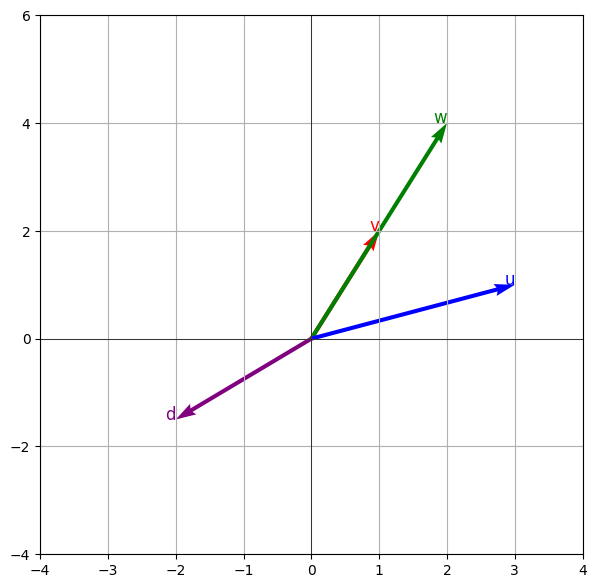

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
v = np.array([1, 2])
w = np.array([2, 4])
u = np.array([3, 1])
d = np.array([-2, -1.5])  # A vector that points in the opposite direction of v (cosine ~ -0.8)

# Origin point for all vectors
origin = np.array([[0, 0, 0, 0], [0, 0, 0, 0]])  # This should match the number of vectors (4 vectors here)

# Plot the vectors
plt.figure(figsize=(7, 7))

# Plot each vector
plt.quiver(*origin, [v[0], w[0], u[0], d[0]], [v[1], w[1], u[1], d[1]], 
           angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b', 'purple'], linewidth=2)

# Set limits and labels
plt.xlim(-4, 4)
plt.ylim(-4, 6)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# Add labels
plt.text(v[0], v[1], 'v', fontsize=12, color='r', ha='right')
plt.text(w[0], w[1], 'w', fontsize=12, color='g', ha='right')
plt.text(u[0], u[1], 'u', fontsize=12, color='b', ha='right')
plt.text(d[0], d[1], 'd', fontsize=12, color='purple', ha='right')

# Show the plot
# plt.title("Cosine illustration")
plt.show()


## Applying vector cosine for phonemes

Okay, let's go back to our vectors for phonemes. Recall that we had the features stop, bilabial, alveolar, voiced, sonorant, and continuant for our example, and that the vectors for /p/, /b/, and /s/ would be 110000, 110100 and 001001, respectively. Let's add one more vector, for the phoneme /z/, which only differs from /s/ in that it is +voiced: 011001. Let's make a function that calculates vector cosine and calculate the cosines for these 4 vectors. 


In [4]:
import numpy as np
import pandas as pd

# Function to compute cosine similarity between two vectors
def cosine_similarity(v, w):
    # Error checking: Ensure vectors have the same length
    if len(v) != len(w):
        raise ValueError("Vectors must have the same length")
    
    # Convert to numpy arrays for easy computation
    v = np.array(v)
    w = np.array(w)
    
    # Compute the dot product
    dot_product = np.dot(v, w)
    
    # Compute the magnitudes (norms) of the vectors
    v_magnitude = np.linalg.norm(v)
    w_magnitude = np.linalg.norm(w)
    
    # Error checking: Ensure we do not divide by zero
    if v_magnitude == 0 or w_magnitude == 0:
        raise ValueError("One or both vectors have zero magnitude, cannot compute cosine similarity")
    
    # Compute cosine similarity
    cosine_sim = dot_product / (v_magnitude * w_magnitude)
    return cosine_sim

# Function to create a cosine similarity table
def create_cosine_table(vectors):
    cosine_table = {}
    for name1, vec1 in vectors.items():
        cosine_table[name1] = {}
        for name2, vec2 in vectors.items():
            cosine_table[name1][name2] = cosine_similarity(vec1, vec2)
    
    # Convert the cosine similarity table to a DataFrame
    cosine_df = pd.DataFrame(cosine_table)
    return cosine_df

# Define the vectors p, b, s, and z
p = [1, 1, 0, 0, 0, 0]
b = [1, 1, 0, 1, 0, 0]
s = [0, 0, 1, 0, 0, 1]
z = [0, 0, 1, 1, 0, 1]

# Create a list of vector names and vectors for pairwise comparison
vectors = {'p': p, 'b': b, 's': s, 'z': z}

# Create and print the cosine similarity table
cosine_df = create_cosine_table(vectors)
print(cosine_df)


          p         b         s         z
p  1.000000  0.816497  0.000000  0.000000
b  0.816497  1.000000  0.000000  0.333333
s  0.000000  0.000000  1.000000  0.816497
z  0.000000  0.333333  0.816497  1.000000


First, of course the cosines comparing a vector to itself are always 1.0; we see those values on the diagonal -- these are the *identity* comparisons. Note also that the matrix is symmetrical: the top row from left to right is identical to the first column from top to bottom, etc. So we can just look at the 'upper' or 'lower' triangles of values, or whichever one is more convenient when we are examining the table (do you see why the upper and lower triangle values have to be the same?).

We see a high cosine between /p/ and /b/, and an identical cosine between /z/ and /s/. Can you explain why they have the same value? 

Also, we see that the cosine between /s/ and /p/ is 0, as is the cosine between /s/ and /b/. This because /s/ has its '1' values only in positions that contain 0 for /p/ and /b/. The cosine for /z/ and /p/ is 0 for the same reason. But the cosine between /z/ and /b/ is greater than 0 because they share the +voiced feature. Now we could extend this approach to a much larger feature set -- and we will later. 

-------

## Part 4

### A Bayesian approach to evaluating phoneme inputs

We are finally ready to return to thinking about how we would extend Bayes' theorem to these kinds of cases. Our feature vectors for each phoneme represent the canonical hypothesis for the features that should be present when the input corresponds to that phoneme. So we want to say that the set of hypotheses is the phoneme inventory: we will assume we are only getting speech input, and the only possible sounds correspond to the ~40 phonemes of English. 

For now, let's do an example where we assume that we only have the phonemes /p/, /b/, /s/, and /z/, and suppose we get an input that does not perfectly match any of these, maybe a pattern like this: 

$$[0.8, 0.7, 0.4, 0.5, 0.2, 0.3]$$

What could this vector mean? It might mean that we have evidence that is 80% consistent with the feature stop, 70% consistent with the feature bilabial, 40% consistent with alveolar, 20% consistent with sonorant, and 30% with continuant. Now how do we evaluate how consistent this evidence vector is with our 4 hypotheses (phonemes)? While there are other alternatives, the most straightforward thing we can do is calculate similarity between that input vector and each of our phonemes. Let's do that in the code block below, by adding a vector called `input`.

<!---
In fact, the file `jstrace-features-no-silence.csv` has 43 features. And they are not just My colleagues and I designed this feature set 
---> 

In [5]:
# everthing else we need was done in previous code blocks;
# we will add the input vector and then calculate all the 
# pairwise cosines and print the table

input = [0.8, 0.7, 0.4, 0.5, 0.2, 0.3]

# Create a list of vector names and vectors for pairwise comparison
vectors = {'p': p, 'b': b, 's': s, 'z': z, 'input': input}

# Create and print the cosine similarity table
cosine_df = create_cosine_table(vectors)
print(cosine_df)


              p         b         s         z     input
p      1.000000  0.816497  0.000000  0.000000  0.820763
b      0.816497  1.000000  0.000000  0.333333  0.893534
s      0.000000  0.000000  1.000000  0.816497  0.383023
z      0.000000  0.333333  0.816497  1.000000  0.536120
input  0.820763  0.893534  0.383023  0.536120  1.000000


All we care about is the final column (or bottom row, since they have identical values). We see that the input is somewhat similar to all our categories. But if we added together all the similarities, they would sum to more than 1.0, so they cannot be probabilities. We want to work with probabilities. What we need to do is, for each phoneme (i.e., each hypothesis), calculate the probability of that phoneme given the input. 

Let's look again at the formula for Bayes' theorem for $n$ evidence elements: 

$$
P(H_1 \mid E_1,\ldots E_n) = \frac{P(E_1,\ldots E_n \mid H_1) P(H_1)}{P(E_1,\ldots E_2)}
$$

But guess what? Instead of considering each $E$ separately, we can instead replace the $P(E_1,\ldots E_2)$ terms with the **similarity** between each phoneme's defined pattern and the input pattern. Let's walk through the logic of this.


**Likelihoods**: Instead of calculating conventional likelihood values ($P(E|H)$), we will use **cosine similarity** as a measure of how similar the input is to each phoneme’s canonical vector. That is, we can approximate the joint probability of each element in the input vector via a similarity measure. 

**Prior**: However, we still need *prior probability* values ($P(H)$) for each phoneme. We will get these from a real language corpus later, but for our example, let's just make up some values. If we are describing how the probability of each phoneme over all occurrences of any phoneme, then when we add together the priors for all our phonemes, the result must be 1.0. So let's say that the priors for /p/, /b/, /s/, and /z/, respectively are 0.2, 0.4, 0.1, and 0.3. 


**Posterior**: Now we are ready to calculate the posterior probabilities of each phoneme using Bayes' theorem.

#### Bayesian Update Using Cosine Similarity

- Let $ H_j $ represent the $j^{th}$ phoneme.
- Let $ \mathbf{v_j} $ be the canonical vector for phoneme $ H_j $.
- Let $ \mathbf{i} $ be the input vector.
- $ P(H_j) $ is the prior probability of phoneme $ H_j $.

Now we substitute the cosine similarity between the input vector and each phoneme’s vector as approximating the likelihood:

$$
P(\mathbf{i} \mid H_j) \approx \cos({\mathbf{v_j}, \mathbf{i}})
$$

Let's simplify this and allow for the possibility that we might use another similarity metric, and instead say the following, where $sim$ is whatever similarity metric we choose:

$$
P(\mathbf{i} \mid H_j) \approx {sim}({\mathbf{v_j}, \mathbf{i}})
$$

Now, applying Bayes' theorem:

$$
P(H_j \mid \mathbf{i}) = \frac{P(\mathbf{i} \mid H_j) P(H_j)}{P(\mathbf{i})} = \frac{sim(\mathbf{i}, \mathbf{v_j}) P(H_j)}{\sum\limits_{k=1}^{n}sim(\mathbf{i}, \mathbf{v_k}) P(H_k)}
$$

Where:
- $ P(H_j \mid \mathbf{i}) $ is the **posterior probability** that the input corresponds to phoneme $ H_j $ (that is, the conditional probability of $H_j$ given input $\mathbf{i}$).
- $ P(\mathbf{i} \mid H_j) $ (the **likelihood** for phoneme $j$) is substituted with the (cosine) similarity between the input vector $ \mathbf{i} $ and the phoneme's defined vector $ \mathbf{v_j} $.
- $ P(H_j) $ is the **prior probability** of the phoneme $ H_j $.
- $ P(\mathbf{i}) $ is the **total evidence**. This corresponds to the sum of the weighted likelihoods, so we write it using $\sum$ notation. The sum notation indicates that there are $n$ phonemes, and we are summing the similarities for each phoneme $k$ (starting with $k=1$, continuing through $k=n$). Note that the sum includes all phonemes, including phoneme $j$.


The way to think about this ratio is is how much of the total similarity 'mass' does phoneme $j$ provide? This is directly analogous to thinking about the ratio of true positives over all positives. 

Let's expand on our python code to calculate the posterior probability of each phoneme given the input pattern [0.8, 0.7, 0.4, 0.5, 0.2, 0.3] and prior probabilities for the 4 phonemes listed above (0.2, 0.4, 0.1, 0.3). 


In [6]:
# Function to compute posterior probabilities using cosine similarity and prior probabilities
def compute_posterior(input_vector, vectors, priors):
    posteriors = {}
    total_weighted_similarity = 0

    # Step 1: Calculate the cosine similarity between the input vector and each phoneme vector
    for phoneme, phoneme_vector in vectors.items():
        cosine_sim = cosine_similarity(input_vector, phoneme_vector)
        
        # Step 2: Multiply the cosine similarity by the prior probability for each phoneme
        weighted_similarity = cosine_sim * priors[phoneme]
        posteriors[phoneme] = weighted_similarity
        
        # Increment the sum with each new weighted similarity
        total_weighted_similarity += weighted_similarity

    # Step 3: Normalize by dividing each prior-weighted similarity by the total weighted similarity
    for phoneme in posteriors:
        posteriors[phoneme] /= total_weighted_similarity

    return posteriors

# Define the prior probabilities for each phoneme
priors = {
    'p': 0.2,
    'b': 0.4,
    's': 0.1,
    'z': 0.3
}

# The input vector to be classified
input_vector = [0.8, 0.7, 0.4, 0.5, 0.2, 0.3]

# Create a list of vector names and vectors for pairwise comparison
vectors = {'p': p, 'b': b, 's': s, 'z': z}

# Compute and print the posterior probabilities for each phoneme
posteriors = compute_posterior(input_vector, vectors, priors)
print("Posterior probabilities for each phoneme:")
for phoneme, probability in posteriors.items():
    print(f"{phoneme}: {probability:.4f}")

Posterior probabilities for each phoneme:
p: 0.2278
b: 0.4959
s: 0.0531
z: 0.2232


Now we have the posteriors. We see that /b/ is substantially more likely given the input than the other phonemes. What should a phoneme-recognition system do at this point? One possibility would be to maximize (exploit) and 'recognize' /b/. Alternatively, these values could be the input to a subsequent module for mapping sequences of phoneme probabilities to words. We will explore a few possibilities below. 

-------

# Part 5

### A Bayesian approach to spoken word recognition

In a Bayesian framework for word recognition, we must work with probabilities conditioned on observed evidence. Our observed evidence will be a sequence of phonetic features, from which we'll calculate the probabilities of possible phonemes at each step. Then we need to continuously map that sequence onto possible words. 

For our first attempt, we are going to try to follow the straightforward logic of the Shortlist B model (Norris & McQueen, 2008). We will simulate spoken word recognition by processing one phoneme at a time. The idea is to update our beliefs (probabilities) about which word is being spoken as new phonemes are observed.

We will simplify the approach compared to Norris & McQueen in several ways. First, if you have read the Shortlist B paper (which you were not asked to do!), you will know that they actually generate a 'shortlist' of words that could start at any position in the input. So if the input is 'catalog', at position 1, they consider any word that starts with /k/ aligned with that position (cat, kit, color, etc.). When the next phoneme arrives, the shortlist at position 1 favors words that begin /kæ/. At the same time, they start a shortlist of words that begin with /æ/ aligned at position 2! This is very interesting, and it allows their system to parse sequences of multiple words in an elegant way. (These are called 'shortlists' because not all possibilities are considered; shortlist size is a parameter of the model, with, e.g., the 20 most frequent [most likely!] possibilities retained).

However, we are simply going to make a model that does isolated word recognition and therefore only considers words aligned at position 1. In other respects, we will make our model as much like theirs as we can. 

> *Note*: æ is the phonetic symbol for the vowel sound in cat.

> *Note: Even though I just described this with phrases like '/k/ aligned with that position', they don't use discrete phoneme inputs. They use distributions of phoneme probabilities, i.e., the probability of each phoneme at each position given the input, similar to what we discussed in the previous part. Instead of phoneme similarities based on phonetic features, they use diphone (phoneme pair) confusion probabilities that were estimated from Dutch speakers listening to real syllables. We can talk more about this in class.*

## Phoneme inputs

#### Bottom-up phoneme probabilities: frequencies, priors, etc.

An assumption on the Shortlist approach is that we will evaluate the evidence for phonemes purely on the basis of bottom-up input. This means that even at later positions, we will not evaluate the conditional probability of a phoneme at the current position given both the current bottom-up evidence (current phoneme) *and* the preceding sequence *or* top-down probabilities based on the words in the lexicon.  

So for each phoneme, we will need a way to calculate $P(Evidence|Phoneme)$ and $P(Phoneme|Evidence)$ (that is, the probability of the evidence [input signal, i.e., the current phoneme-sized sound pattern] given a specific phoneme, and the probability of that phoneme given the evidence). What is the evidence? It will be the phoneme that is the input at each position. So we could simply say that if the input is /k/, it is 100% likely that /k/ has occurred and 0% evidence for all other phonemes. However, we know that humans typically do not 'recognize' phonemes with 100% accuracy -- in large part because speakers' productions are not 100% unambiguous. So when the word is 'bet', listeners will be most likely to hear the first sound as /b/, but there will be some probability that they will hear it is /p/ (pet) or /g/ (get), but also very low chance that they will hear it as /s/ (set) or /f/ (fête). We will have graded confusability among phonemes. (A related note: there is evidence that people are sensitive to the distribution of probabilities of *all* phonemes; it's not that sometimes we just hear /b/ and sometimes we just hear /p/, when the input was intended to be /b/. Rather, we are attuned to the probabilities of /p/, /b/, /t/, /d/, /m/, etc., given natural speech input.)

We could get these from human perceptual data, like Norris and McQueen did for Dutch. But this would be a massive undertaking. In the Part 4, we already discussed a way to generate theoretically-based similarities, based on what we know about the *phonetic features* linguists have described for different phonemes. We will use a much larger feature set (43 features, though it's possible to describe all phonemes in English robustly with 18 features; I'll explain why we use so many later). Based on the features, we can create a table where each column is a phonetic feature, so each row is the phonetic feature vector for a different phoneme. 

At first, we will assume clean, noise-free inputs. So when the current phoneme is /b/, we just take the /b/ row from the dataframe. Because other phonemes share features with /b/, we will not propose that /b/ is 100% likely when the input is the vector for /b/. Instead, we will consult the (cosine) similarities of the vector for /b/ to all other phoneme vectors, weight those similarities by the prior probabilites (relative frequencies) of each phoneme, and normalize (divide each phoneme's prior-weighted similarity to the input by the sum of all phonemes' similarities to the input). 


This approach is a bit different from that taken by Norris and McQueen (2008). Here is the step where they calculate posterior (conditional) probabilities of phonemes given the current input (their Equation 3): 

$$
P(Phoneme_{j}|Evidence)=\frac{P(Evidence|Phoneme_{j}) \times P(Phoneme_{j})}{\sum\limits_{k=1}^{n}P(Evidence|Phoneme_{k}) \times P(Phoneme_{k})}
$$

where there are $m$ phonemes in the set. 

But recall, we are doing this step like this instead:


$$
P(H_j \mid \mathbf{i}) = \frac{P(\mathbf{i} \mid H_j) P(H_j)}{P(\mathbf{i})} = \frac{sim(\mathbf{i}, \mathbf{v_j}) P(H_j)}{\sum\limits_{k=1}^{n}sim(\mathbf{i}, \mathbf{v_k}) P(H_k)}
$$

Where:
- $ P(H_j \mid \mathbf{i}) $ is the **posterior probability** that the input corresponds to phoneme $ H_j $ (that is, the conditional probability of $H_j$ given input $\mathbf{i}$).
- $ P(\mathbf{i} \mid H_j) $ (the **likelihood** for phoneme $j$) is substituted with the (cosine) similarity between the input vector $ \mathbf{i} $ and the phoneme's defined vector $ \mathbf{v_j} $.
- $ P(H_j) $ is the **prior probability** of the phoneme $ H_j $.
- $ P(\mathbf{i}) $ is the **total evidence**. This corresponds to the sum of the weighted likelihoods, so we write it using $\sum$ notation. The sum notation indicates that there are $n$ phonemes, and we are summing the similarities for each phoneme $k$ (starting with $k=1$, continuing through $k=n$). Note that the sum includes all phonemes, including phoneme $j$.


## Words

Now let's consider words. 

#### Prior Probability (Word Frequency)

Before any phonemes are observed, our belief about which word is likely to be spoken would be based on the frequency with which each word occurs in the language. This is our *prior distribution*,  $ P(\mathbf{W}) $, where $ \mathbf{W} $ is a vector with frequencies known words (typically expressed as occurrences per 1 million words). In the simplest case, we convert freqencies to probabilities by normalizing them -- we divide each word's frequency by the sum of all words' frequencies.

#### Likelihood (words)

As each new phoneme is observed, we want to update our estimate of how likely each word is to be the current word (that is coming in phoneme-by-phoneme). So we take the $PhonemeString$ that has emerged so far as the Evidence (think of this as a matrix with 1 column for every time step and 1 row for every phoneme, with each cell containing the probability of the phoneme at that position), and then need to calculate $P(Word_{j}|Evidence)$ for each word $j$ (that is, we need to calculate the probability of word $j$ given the input thus far). Norris & McQueen do this with their Equation 4. 

$$
Likelihood(Word_{j}) = P(Evidence|Word_{j})=P(PhonemeString_{k})=\prod\limits_{k=1}^{n}P(Phoneme_{k}|Evidence)
$$

So this says that we will proceed in phoneme-size steps. At each step we get the probability of each phoneme given the bottom-up input. Now we are going to make a somewhat dubious assumption: that the phonemes at each position are independent of each other. This is an assumption Norris & McQueen make. Of course, the probability of /k/ being followed by /æ/ is probably higher than the probability of /k/ being followed by /s/ (as happens in the word *taxes*, where the phonemes are /tæks^z/). But we will ignore that for now, and accept their assumption that each phoneme is independent of the others. If the phonemes are independent events, how do we calculate the probability of a sequence of independent events? Recall that for coin flips, we find the probability of 3 heads in a row by multiplying 0.5 x 0.5 x 0.5. So in the equation above, we do the same thing: the right side of the equation is saying we will calculate the product of the phoneme probabilities at each position.  

So if we consider whether the input sequence is a good match to the word is 'cat', which has phonemes /k/, /æ/, and /t/, we would calculate $P(k|i_1) \times P(æ|i_2) \times P(t|i_3)$ (where $i_1, i_2,$ and $i_3$ are the inputs at positions 1-3). To evaluate the likelihood that the word is /fæt/, we would calcuate $P(f|i_1) \times P(æ|i_2) \times P(t|i_3)$. In fact, we do this for every word in the lexicon. 

#### Posterior Probability (words)

Then to get the posterior probability for each word at the current position, we use Equation 5 from Norris & McQueen.

$$
P(Word_{i}|Evidence)=\frac{P(Evidence|Word_{i}) \times P(Word_{i})}
{\sum\limits_{j=1}^{j=n}P(Evidence|Word_{j}) \times P(Word_{j})}
$$

which we can calculate by using $PhonemeString$ values:

$$
Posterior = P(Word_{i}|Evidence)=\frac{P(PhonemeString_{i}) \times P(Word_{i})}
{\sum\limits_{j=1}^{j=n}P(PhonemeString_{j}) \times P(Word_{j})}
$$

We will do this at each phoneme position in 'left-to-right' fashion (first to last phonemes) in order to generate an ongoing estimate of probabilities. We will try to relate this to some fine-grained measures of human spoken word recognition later. 

*Note: in 2024, I revamped the phoneme section a lot, and I will need to do more work to make the word and phoneme sections more compatible.*

---

Let's try to implement this model! 

### Step 1: Import the lexicon

The first thing we need is a lexicon that will have the list of words we want to consider, and their *prior probabilities*. Prior probability for words is usually expressed as frequency [occurrences] per million words. To calculate this, we take a big *corpus* of text or speech. For example, we could take 10 years worth of the text of the *New York Times*, everything that has ever been posted on Twitter, or we could use ever-growing databases that compile subtitles from speech transcribed for movies, shows, etc. 

We are going to use a lexicon called *lemmalex* that uses a variety of sources, but mainly subtitle databases. This is from a tool for the R statistical programming language that my lab released called *LexFindR* (Li, Z., Crinnion, A. M., & Magnuson, J. S. (2021). LexFindR: A fast, simple, and extensible R package for finding similar words in a lexicon. *Behavior Research Methods*. https://doi.org/10.3758/s13428-021-01667-6). 

Let's read it into a dataframe called `lexicon_df`. We will also create a log frequency column. Then we can look at the first 5 rows by calling `lexicon_df.head()`:

In [7]:
from collections import defaultdict
import pandas as pd
import numpy as np

# Function to read in the lexicon file
def read_lexicon_file(filepath):
    lexicon_df = pd.read_csv(filepath)
    return lexicon_df

# Read the lexicon file
lexicon_df = read_lexicon_file('./lemmalex.csv')

# Drop any rows with NaN [not a number, here indicating no value] available
# values in the 'Pronunciation' column
lexicon_df = lexicon_df.dropna(subset=['Pronunciation'])

# add log frequency column
lexicon_df['lfrq'] = np.log(lexicon_df['Frequency'] + 1)
lexicon_df.head()


Item  Frequency              Pronunciation      lfrq
0            a   20415.27                         AH  9.924087
1      abandon       8.10           AH B AE N D IH N  2.208274
2  abandonment       0.96  AH B AE N D AH N M AH N T  0.672944
3        abate       0.10                  AH B EY T  0.095310
4        abbey       3.18                    AE B IY  1.430311

---

Here are simple ways to get the length (number of rows) in the dataframe and also to summarize its numerical columns. Note that frequencies are occurrences per million words. 

In [8]:
# this will show that there are 17,750 words in the lexicon
len(lexicon_df), lexicon_df.describe()

(17750,
           Frequency          lfrq
 count  17750.000000  17750.000000
 mean      43.262201      1.222613
 std      651.204163      1.398385
 min        0.020000      0.019803
 25%        0.250000      0.223144
 50%        1.020000      0.703098
 75%        4.760000      1.750937
 max    41857.120000     10.642041)

---

### Look at frequency using histograms

Wow, those frequency ranges are huge -- from 0.02 occurrence per million words to 41,857!

Let's make a function that will plot histograms and then a 'cumulative sort plot'. The histogram plots the frequency of different values. The sort plot just sorts the values and plots them in sequence. We will see that there are a very small number of very high frequency items (like the words 'the' or 'a'). This helps illustrate why it's useful to move the raw frequency counts to log values. 

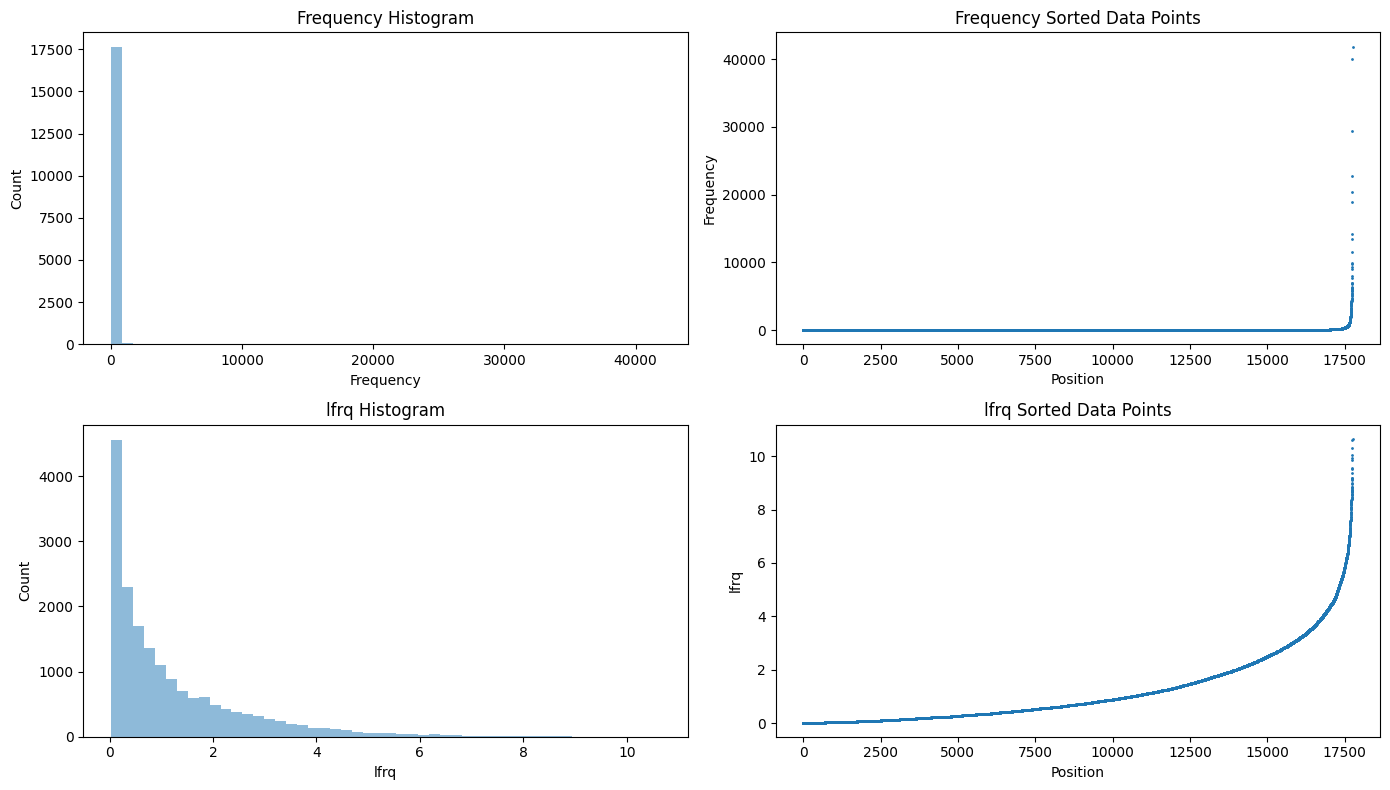

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


def plot_histograms(df, columns, pointsize=1, alphaval = 0.5, bins=50):
    """
    Plots histograms for the specified columns of the given DataFrame.
    Adds a subplot below each histogram to show the individual data points.
    
    Parameters:
        df (DataFrame): The DataFrame containing the specified columns.
        columns (list): List of column names to plot.
    """
    # Calculate the number of rows needed for the subplots
    n_rows = len(columns)
    
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows), gridspec_kw={'width_ratios': [4, 4]})
    
    # If there's only one row, axs is a 1D array and we need to reshape it
    if n_rows == 1:
        axs = axs.reshape(1, -1)
    
    # Flatten the axs array for easy iteration
    axs = axs.flatten()
    
    # Plot histograms and individual data points
    for idx, col in enumerate(columns):
        # Plot histogram
        axs[2 * idx].hist(df[col], bins=bins, alpha=alphaval)
        axs[2 * idx].set_title(f'{col} Histogram')
        axs[2 * idx].set_xlabel(col)
        axs[2 * idx].set_ylabel('Count')
        # Apply log scale to raw frequency ('Frequency') histogram
        # if col == 'Frequency':
        #     axs[2 * idx].set_xscale('log')
        #     axs[2 * idx].set_yscale('log')
        
        # Plot individual data points sorted by value
        sorted_data = np.sort(df[col].values)
        axs[2 * idx + 1].plot(sorted_data, marker='o', linestyle='', markersize = pointsize)
        axs[2 * idx + 1].set_title(f'{col} Sorted Data Points')
        axs[2 * idx + 1].set_xlabel('Position')
        axs[2 * idx + 1].set_ylabel(col)
        
        # Apply log scale to raw frequency ('Frequency') histogram
        # if col == 'Frequency':
        #     axs[2 * idx + 1].set_xscale('log')
        #     axs[2 * idx + 1].set_yscale('log')

    # Hide any extra subplots
    for idx in range(2 * len(columns), len(axs)):
        axs[idx].axis('off')

    
    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage:
plot_histograms(lexicon_df, ['Frequency', 'lfrq'])


### Trimming based on frequency

For reasons we can discuss in class, having small numbers of items with very high frequency is problematic. Let's just cut items with log frequency more than 3 standard deviations above the mean. (For those of you who care about these details, Berger & Kiefer [2021] compared various methods for trimming outlying values and found that a simple 3SD threshold is a minimally biased approach; they are concerned with reaction time data, but this is a fine way to proceed for our purposes... if this were a research project we intended to publish, we would have to delve a bit deeper and really understand the characteristics of the items we are trimming).


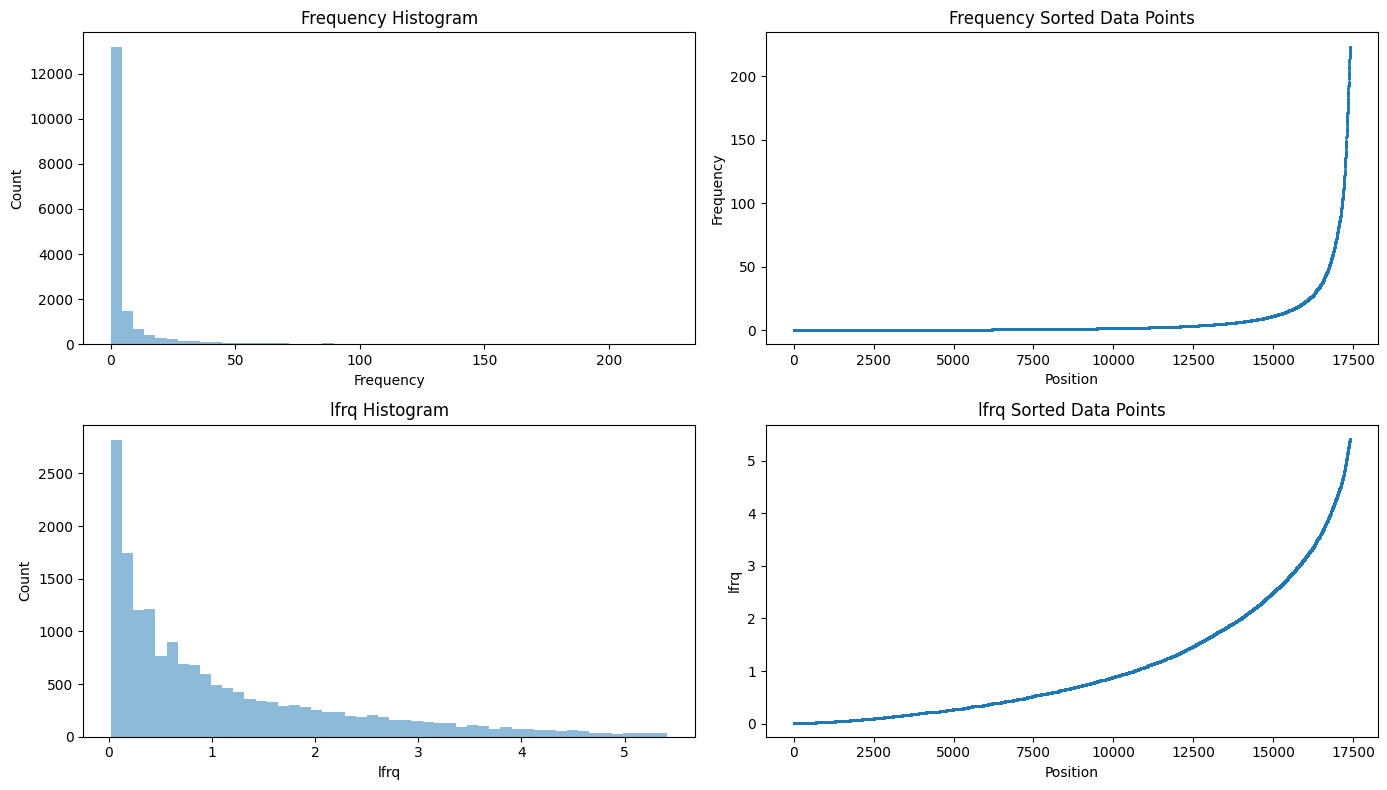

In [10]:
# Calculate mean and standard deviation of 'lfrq'
mean_lfrq = lexicon_df['lfrq'].mean()
std_lfrq = lexicon_df['lfrq'].std()

# Define the boundaries for acceptable 'lfrq' values
lower_bound = mean_lfrq - 3 * std_lfrq
upper_bound = mean_lfrq + 3 * std_lfrq

# Remove records where 'lfrq' is more than 3 standard deviations from the mean
filtered_lexicon_df = lexicon_df[(lexicon_df['lfrq'] >= lower_bound) & (lexicon_df['lfrq'] <= upper_bound)]

# replot histograms
plot_histograms(filtered_lexicon_df, ['Frequency', 'lfrq'])


The **trimmed data** seems better. We have a smaller range, and fewer points way out at high values. Next code cells describe and then just take the filtered lexicon as our default lexicon.

In [11]:
# much better; let's redescribe
filtered_lexicon_df.describe()

Frequency          lfrq
count  17397.000000  17397.000000
mean       7.590574      1.112872
std       21.898453      1.168418
min        0.020000      0.019803
25%        0.240000      0.215111
50%        0.960000      0.672944
75%        4.240000      1.656321
max      223.550000      5.414098

In [12]:
len(lexicon_df), len(filtered_lexicon_df), (len(filtered_lexicon_df) / len(lexicon_df))

(17750, 17397, 0.980112676056338)

In [13]:
# let's just replace lexicon_df with the filtered one
lexicon_df = filtered_lexicon_df

---

### An aside: phonemes

Again, phonemes are roughly the consonants and vowels of a language. Note that there is not a 1-to-1 mapping between phonemes and letters in English. We can get a /k/ sound from the letters C, K, QU, for example. The letter A can link to sounds like *ay*, *eh*, *uh*, *ah*, *ae* [as in cat], etc. In North American English dialects, we typically have 39-40 phonemes that we have to represent using 26 letters. 

Linguists use the International Phonetic Alphabet to transcribe sounds across languages. The lexicon file we are using uses a symbol system often used in natural language processing computing called *Arpabet*. Here's how to map phonemes to IPA and to actual sounds using examples. This data for this table comes from the website of a speech recognition company called Soapbox.

| Arpabet (SoapBox) | IPA | Example   |
|-------------------|-----|-----------|
| AA                | ɑ   | balm, bot |
| AE                | æ   | bat       |
| AH                | ʌ   | butt      |
| AO                | ɔ   | cot       |
| AW                | aʊ  | bout      |
| AY                | aɪ  | bite      |
| EH                | ɛ   | bet       |
| ER                | ɝ   | bird      |
| EY                | eɪ  | bait      |
| IH                | ɪ   | bit       |
| IY                | i   | beat      |
| OW                | oʊ  | boat      |
| OY                | ɔɪ  | boy       |
| UH                | ʊ   | book      |
| UW                | u   | boot      |
| B                 | b   | buy       |
| CH                | tʃ  | china     |
| D                 | d   | die       |
| DH                | ð   | thy, bathe|
| F                 | f   | fight     |
| G                 | g   | guy       |
| HH                | h   | high      |
| JH                | dʒ  | jump      |
| K                 | k   | kite      |
| L                 | l   | lie       |
| M                 | m   | my        |
| N                 | n   | night     |
| NG                | ŋ   | sing      |
| P                 | p   | pie       |
| R                 | ɹ   | rye       |
| S                 | s   | sigh      |
| SH                | ʃ   | shy       |
| T                 | t   | tie       |
| TH                | θ   | think     |
| V                 | v   | vie       |
| W                 | w   | wise      |
| Y                 | j   | yacht, yet|
| Z                 | z   | zoo       |
| ZH                | ʒ   | pleasure  |


---

### Phoneme similarity


We are going to do simulations by presenting one phoneme at a time. We could use 'localist' or 'one-hot' representations, where each phoneme has a discrete value and no similarity to other phonemes (so when the input is /k/, the evidence for /k/ would be 100% and evidence for all other phonemes would be 0%). However, we know from a century of research that humans perceive some phonemes (e.g., 'b' and 'p') as more similar than others (e.g., 'p' and 'a' are not similar). So we want to include this in our simulation. If the word is 'bat', the phoneme /b/ should give us high evidence that /b/ has occurred, but also moderate evidence that /p/ may have occurred, and very low evidence that /o/ occurred (because /b/ is quite similar to /p/ but quite different from /o/, phonetically). 

There are various ways to estimate similarity. For example, we can present phonemes in noise to listeners and ask them to transcribe what they hear. Then we can calculate 'confusability' or similarity as how often, for example, people answered 'p' when the actual input was 'b'. 

There are a *lot* of potential sources for such 'confusion' data, but it is not obvious how to use it. For example, Luce (1986) argued in his dissertation that his confusion data could not generalize beyond the specific conditions under which it was collected -- it applied only for the particular level of noise and other conditions under which it was collected. 

Let's figure out a way to do our own similarity estimates from what data is avaialble to us. 

### Phonetic similarity

We could use featural definitions of phonemes. For example, /p/ and /b/ are both bilabial stops. The only difference is that /b/ is 'voiced' while /p/ is 'voiceless'. We could compare phonemes on their featural similarity. We might do this later... Let's try a method that does not depend on us knowing the featural definitions. 

### Context similarity

It turns out that we can learn a lot about some element in the world or in a system (phoneme, word, object) by the company it keeps. Let's just go through the lexicon and count how many times any phoneme pair co-occurs adjacently. So for example, the word 'cat' has the phonemes /k/, /æ/, and /t/. So we could increment the count for /kæ/ and /æt/, the two pairs of phonemes that occur. To tabulate this, we'll make a phoneme-by-phoneme matrix. So for cat, we would increment the counts for {k,æ}, {æ, k}, {æ, t}, and {t, æ}. However, we should also adjust this for word frequency. The word cat occurs fairly often, so we would want to boost these counts a bit more than the counts for the same pairs from the word catalytic. We will use word frequency to do this. 

What we will end up with is a phoneme-by-phoneme matrix that counts how often each phoneme occurs with every other phoneme. At the end of the code cell, we display a bit of the matrix, and also the calculated prior probability for each phoneme. Note that the matrix is showing how often each phoneme-phoneme pair occurred. So AA,AA will be 0 because that sequence does not occur within words. 

In [14]:

# Extract unique phonemes
unique_phonemes = set()
for pronunciation in lexicon_df['Pronunciation']:
    phonemes = pronunciation.split()
    unique_phonemes.update(phonemes)
sorted_unique_phonemes = sorted(list(unique_phonemes))
num_phonemes = len(sorted_unique_phonemes)
phoneme_to_index = {phoneme: index for index, phoneme in enumerate(sorted_unique_phonemes)}

# Create a weighted matrix for phoneme pairs
weighted_phoneme_matrix_dict = defaultdict(float)
# create dictionary for frequency-weighted counts of each phoneme
phoneme_count_dict = defaultdict(float)


# Now let's fill the matrix
fweight = 1.0 # how much to use frequency; when set to 1, just use full value
for _, row in lexicon_df.iterrows():
    pronunciation, lfrq = row['Pronunciation'], row['lfrq']
    phonemes = pronunciation.split()
    
    # Update the frequency-weighted count for each individual phoneme
    for phoneme in phonemes:
        phoneme_count_dict[phoneme] += (lfrq * fweight)
 
    for i in range(len(phonemes) - 1):
        first_phoneme, second_phoneme = phonemes[i], phonemes[i + 1]
        weighted_phoneme_matrix_dict[(first_phoneme, second_phoneme)] += (lfrq * fweight)
        weighted_phoneme_matrix_dict[(second_phoneme, first_phoneme)] += (lfrq * fweight)


# Initialize the weighted matrix
weighted_phoneme_matrix = np.zeros((num_phonemes, num_phonemes), dtype=float)
for (first, second), count in weighted_phoneme_matrix_dict.items():
    i, j = phoneme_to_index[first], phoneme_to_index[second]
    weighted_phoneme_matrix[i, j] = count

# Convert the matrix to a DataFrame for better readability
weighted_phoneme_matrix_df = pd.DataFrame(weighted_phoneme_matrix, index=sorted_unique_phonemes, columns=sorted_unique_phonemes)

# Convert the phoneme_count_dict to a DataFrame for better readability
phoneme_count_df = pd.DataFrame(list(phoneme_count_dict.items()), columns=['Phoneme', 'FrequencyWeightedCount']).sort_values(by='FrequencyWeightedCount', ascending=False)

# Calculate the sum of all FrequencyWeightedCount values
total_count = phoneme_count_df['FrequencyWeightedCount'].sum()

# Add a new column for normalized probabilities
phoneme_count_df['phon_prob'] = phoneme_count_df['FrequencyWeightedCount'] / total_count

# Create a simpler dictionary that just pairs phonemes with their normalized probabilities (phon_prob)
phoneme_prob_dict = dict(zip(phoneme_count_df['Phoneme'], phoneme_count_df['phon_prob']))
phoneme_prob_dict

# Display a portion of the weighted matrix and phoneme count matrix for review
weighted_phoneme_matrix_df.iloc[:10, :5], phoneme_prob_dict#,phoneme_count_df.iloc[:100, :10]


(            AA          AE           AH         AO         AW
 AA    0.000000    0.000000     0.000000   0.000000   0.000000
 AE    0.000000    0.000000     0.000000   0.000000   0.000000
 AH    0.000000    0.000000     1.280758   1.350667  39.343166
 AO    0.000000    0.000000     1.350667   0.000000   0.000000
 AW    0.000000    0.000000    39.343166   0.000000   0.000000
 AY    7.207485    5.742495   102.973433   2.414126   0.000000
 B   185.558680  283.949295  1000.629454  54.270354  24.262590
 CH   40.617086  108.511521   210.936280   5.700518  10.245048
 D   134.052686  186.728707   844.436416  55.920047  56.054154
 DH    8.222988   14.214397    90.675537   0.000000   3.154017,
 {'AH': 0.1041717568844594,
  'R': 0.08762797978723763,
  'IH': 0.0799592708972376,
  'T': 0.06813767731764012,
  'N': 0.06763029365957593,
  'S': 0.06098663594854901,
  'L': 0.05478876040112506,
  'K': 0.04727856415076621,
  'D': 0.03389393117466113,
  'IY': 0.033529270909775345,
  'P': 0.033084815530742

In [15]:
probability_for_AH = phoneme_prob_dict.get("AH", "Phoneme not found")
probability_for_AH

0.1041717568844594

---

### Converting counts to similarities

Once we have the matrix, now we can take the rows or columns as 'representations' of each phoneme, in terms of how often the phoneme co-occurs with other phonemes. To get pairwise similarity, we could compare the Euclidean distance of the vectors. Another approach is to use *cosine* similarity. 

## Cosine Similarity


There is a new (in 2024) section earlier on that discusses cosine simmilarity. I gave code with a function that provides vector cosine. But we can also just get it from the `sci-kit-learn` package, as in the code block below. 

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity between each pair of phoneme vectors
cosine_sim_matrix = cosine_similarity(weighted_phoneme_matrix)

# Convert the similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=sorted_unique_phonemes, columns=sorted_unique_phonemes)

# Display a portion of the cosine similarity matrix
cosine_sim_df.iloc[:10, :10]


AA        AE        AH        AO        AW        AY         B  \
AA  1.000000  0.966031  0.931129  0.848900  0.757327  0.785100  0.258615   
AE  0.966031  1.000000  0.948020  0.808589  0.845911  0.856638  0.242135   
AH  0.931129  0.948020  1.000000  0.892759  0.798543  0.891911  0.295744   
AO  0.848900  0.808589  0.892759  1.000000  0.566249  0.766836  0.306023   
AW  0.757327  0.845911  0.798543  0.566249  1.000000  0.814663  0.268305   
AY  0.785100  0.856638  0.891911  0.766836  0.814663  1.000000  0.358534   
B   0.258615  0.242135  0.295744  0.306023  0.268305  0.358534  1.000000   
CH  0.311287  0.328735  0.334902  0.243556  0.461216  0.364591  0.820980   
D   0.359275  0.371903  0.415630  0.328706  0.487079  0.413384  0.765612   
DH  0.116166  0.096337  0.130527  0.143260  0.183749  0.206859  0.933101   

          CH         D        DH  
AA  0.311287  0.359275  0.116166  
AE  0.328735  0.371903  0.096337  
AH  0.334902  0.415630  0.130527  
AO  0.243556  0.328706  0.143260  
AW  0.461216  0.487079  0.183749  
AY  0.364591  0.413384  0.206859  
B   0.820980  0.765612  0.933101  
CH  1.000000  0.950619  0.757804  
D   0.950619  1.000000  0.692227  
DH  0.757804  0.692227  1.000000

We can see that self-similarity (cosine) is 1.0 for all phonemes. We can also see that some pairs have extremely high cosines -- e.g., $[/AA/, /AE/]= 0.966031$. This is probably too high. Let's downweight the non-identity similarities by dividing them by a constant. 

**Note**: This is a very consequential decision (dividing by 5). We may want to try smaller or larger values...

In [17]:
# Adjust the diagonal entries from 1.0 to 0.9
#np.fill_diagonal(cosine_sim_matrix, 0.9)

# Reduce the off-diagonal entries -- divide by 5 for now
off_diagonal_indices = np.where(~np.eye(cosine_sim_matrix.shape[0], dtype=bool))
adjusted_cosine_sim_matrix = cosine_sim_matrix.copy()
adjusted_cosine_sim_matrix[off_diagonal_indices] /= 5.0

# Convert the adjusted similarity matrix to a DataFrame for better readability
adjusted_cosine_sim_df = pd.DataFrame(adjusted_cosine_sim_matrix, index=sorted_unique_phonemes, columns=sorted_unique_phonemes)

# Display a portion of the adjusted cosine similarity matrix
adjusted_cosine_sim_df.iloc[:10, :10]


AA        AE        AH        AO        AW        AY         B  \
AA  1.000000  0.193206  0.186226  0.169780  0.151465  0.157020  0.051723   
AE  0.193206  1.000000  0.189604  0.161718  0.169182  0.171328  0.048427   
AH  0.186226  0.189604  1.000000  0.178552  0.159709  0.178382  0.059149   
AO  0.169780  0.161718  0.178552  1.000000  0.113250  0.153367  0.061205   
AW  0.151465  0.169182  0.159709  0.113250  1.000000  0.162933  0.053661   
AY  0.157020  0.171328  0.178382  0.153367  0.162933  1.000000  0.071707   
B   0.051723  0.048427  0.059149  0.061205  0.053661  0.071707  1.000000   
CH  0.062257  0.065747  0.066980  0.048711  0.092243  0.072918  0.164196   
D   0.071855  0.074381  0.083126  0.065741  0.097416  0.082677  0.153122   
DH  0.023233  0.019267  0.026105  0.028652  0.036750  0.041372  0.186620   

          CH         D        DH  
AA  0.062257  0.071855  0.023233  
AE  0.065747  0.074381  0.019267  
AH  0.066980  0.083126  0.026105  
AO  0.048711  0.065741  0.028652  
AW  0.092243  0.097416  0.036750  
AY  0.072918  0.082677  0.041372  
B   0.164196  0.153122  0.186620  
CH  1.000000  0.190124  0.151561  
D   0.190124  1.000000  0.138445  
DH  0.151561  0.138445  1.000000

This looks better. Let's normalize the values though to treat them like probabilities. 

(***Why would we do this?*** 

In [18]:
# Normalize the rows of the adjusted cosine similarity matrix so they sum to 1
row_sums = adjusted_cosine_sim_matrix.sum(axis=1)
normalized_cosine_sim_matrix = adjusted_cosine_sim_matrix / row_sums[:, np.newaxis]

# Convert the normalized similarity matrix to a DataFrame for better readability
normalized_cosine_sim_df = pd.DataFrame(normalized_cosine_sim_matrix, index=sorted_unique_phonemes, columns=sorted_unique_phonemes)

# Display a portion of the normalized cosine similarity matrix
normalized_cosine_sim_df.iloc[:10, :10]

AA        AE        AH        AO        AW        AY         B  \
AA  0.231184  0.044666  0.043052  0.039250  0.035016  0.036300  0.011958   
AE  0.043542  0.225367  0.042730  0.036446  0.038128  0.038612  0.010914   
AH  0.041180  0.041927  0.221132  0.039483  0.035317  0.039446  0.013080   
AO  0.041679  0.039700  0.043833  0.245491  0.027802  0.037650  0.015025   
AW  0.034274  0.038283  0.036140  0.025627  0.226284  0.036869  0.012143   
AY  0.032920  0.035920  0.037399  0.032154  0.034160  0.209655  0.015034   
B   0.009705  0.009087  0.011098  0.011484  0.010069  0.013455  0.187634   
CH  0.011055  0.011675  0.011894  0.008650  0.016379  0.012948  0.029156   
D   0.012692  0.013139  0.014683  0.011613  0.017208  0.014604  0.027048   
DH  0.004986  0.004135  0.005602  0.006149  0.007886  0.008878  0.040048   

          CH         D        DH  
AA  0.014393  0.016612  0.005371  
AE  0.014817  0.016763  0.004342  
AH  0.014811  0.018382  0.005773  
AO  0.011958  0.016139  0.007034  
AW  0.020873  0.022044  0.008316  
AY  0.015288  0.017334  0.008674  
B   0.030809  0.028731  0.035016  
CH  0.177568  0.033760  0.026912  
D   0.033583  0.176640  0.024455  
DH  0.032524  0.029710  0.214597

*When we divide non-identity values by 2, the normalized values wind up being around 0.1 for identity and 0.05 for highly similar items. These may be too similar, so I've instead divided by 5. This makes the identity values around 0.22 and high sim items 0.04. Might not be perfect, but let's try this. *

---

### Visualizing similarity

A simple and effective way to visualize similarity when we have a matrix is to use a *heatmap*, where color indicates value. 

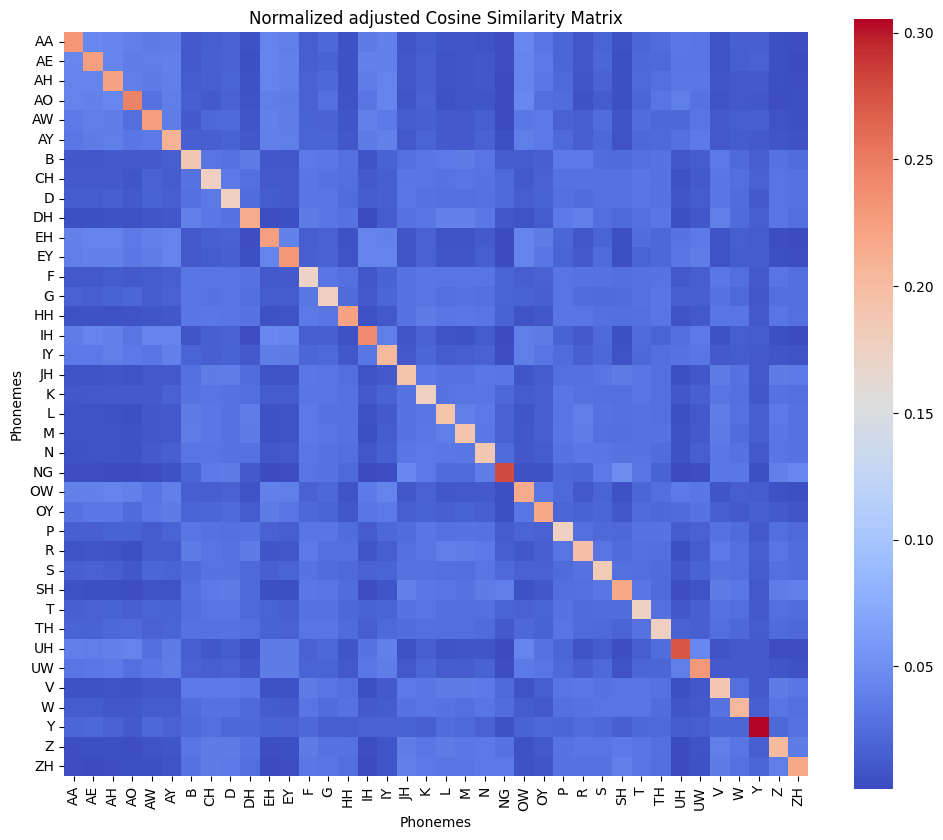

In [19]:
# let's visualize it

import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(normalized_cosine_sim_df, annot=False, cmap="coolwarm", cbar=True, square=True)

# Add labels and title
plt.title("Normalized adjusted Cosine Similarity Matrix")
plt.xlabel("Phonemes")
plt.ylabel("Phonemes")

# Adjust the font size of the tick labels
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=8)

# Show the plot
plt.show()


So we can definitely see structure here. But phonemes are sorted alphabetically. Could we resort in some way to put similar things near similar things? Let's use a standard *clustering* technique called *hierarchical clustering* (which will reorder the columns so that similar items are near each other) and then recreate the heatmap. 

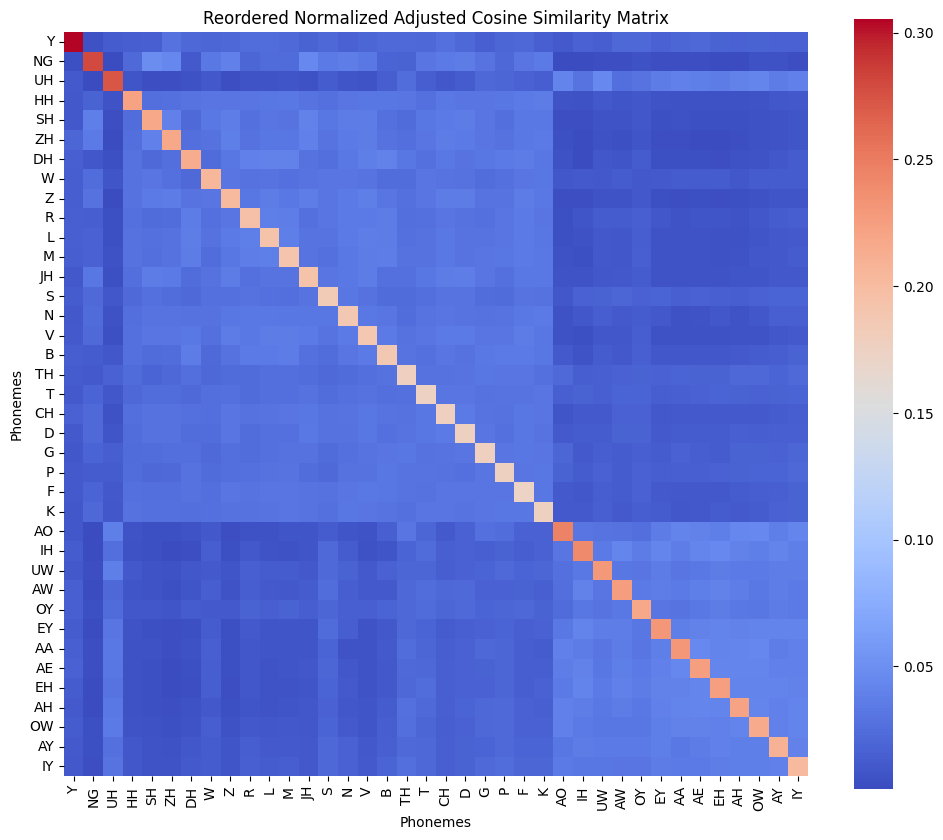

In [20]:
# Let's cluster first

from scipy.cluster.hierarchy import linkage, leaves_list
import seaborn as sns

# Perform hierarchical clustering
link = linkage(normalized_cosine_sim_df, method='average')

# Get the order of rows according to the hierarchy
row_order = leaves_list(link)

# Reorder the DataFrame
sorted_unique_phonemes = np.array(sorted_unique_phonemes)  # Assuming it's a list; convert to NumPy array
sorted_unique_phonemes = sorted_unique_phonemes[row_order]

# Reorder rows and columns based on hierarchical clustering
reordered_df = normalized_cosine_sim_df.loc[sorted_unique_phonemes, sorted_unique_phonemes]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reordered_df, annot=False, cmap='coolwarm', cbar=True, square=True)
plt.title("Reordered Normalized Adjusted Cosine Similarity Matrix")
plt.xlabel("Phonemes")
plt.ylabel("Phonemes")
plt.show()


Much better! we can now see consonants and vowels tend to be grouped together. However, there's a big gap between identity (.2-.3) and high cosine values (which we scaled down to less than 0.05). This means we are not using the color scale completely. Let's leave out the high values and see if we can improve the heatmap. 

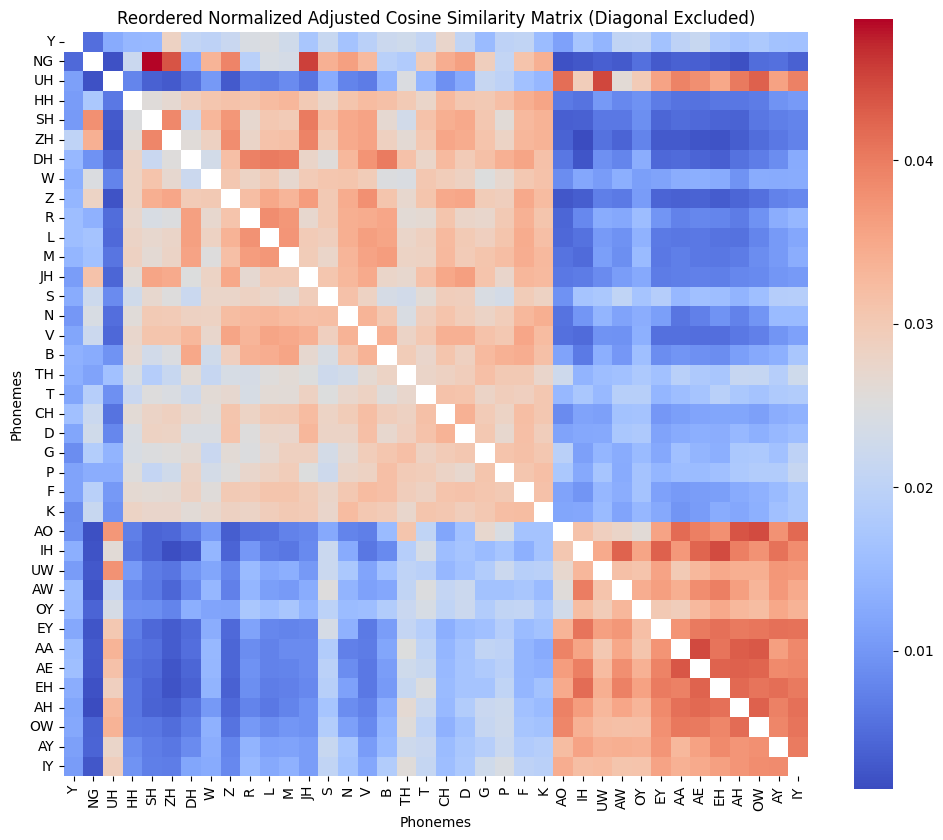

In [21]:
# Let's leave the identity positions out to make the scale smaller

# Set the diagonal entries to NaN
np.fill_diagonal(reordered_df.values, np.nan)
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reordered_df, annot=False, cmap='coolwarm', cbar=True, square=True, mask=np.isnan(reordered_df))
plt.title("Reordered Normalized Adjusted Cosine Similarity Matrix (Diagonal Excluded)")
plt.xlabel("Phonemes")
plt.ylabel("Phonemes")
plt.show()


Much better again; now we can really see the structure (unfortunately, UH is getting grouped between NG and HH rather than after K...). It may be that this is not a good basis for estimating human perceptual similarity, but it seems to get the basics correct. 

---



### Bayesian word recogntion simulation

We are now ready to try to simulate words using Bayesian principles. 

The function(s) below carry out calculations according to the principles we reviewed at the start of this notebook. 

Note the `topX` variable. Norris and McQueen say it is fine to compute posteriors over the whole lexicon, because most words will have low evidence, and they limit to the top 50 words simply for convenience. However, when you have 17,000 words and all have non-zero evidence, even miniscule evidence 17,000 times adds up to a lot. So the `topX` value actually matters a lot. If we don't make this a pretty small number (like 50 relative to 17,000) our probabilities will be tiny... 

In [22]:

import time
from collections import defaultdict
import pandas as pd
import numpy as np

def get_phoneme_prob_at_position(phoneme, normalized_cosine_sim_df, phoneme_prob_dict):
    
    """
    Calculate the bottom-up probability for a phoneme at a given position.
    
    Parameters:
        phoneme (str): The current phoneme.
        normalized_cosine_sim_df (DataFrame): The DataFrame containing the normalized cosine similarities between phonemes.
        phoneme_prob_dict (dict): The dictionary containing the probabilities of each phoneme.
        
    Returns:
        pd.Series: The probabilities of each phoneme at the current position.
    """
    evidence_distribution = normalized_cosine_sim_df.loc[phoneme]
    
    # Instead of multiplying the whole Series with a dictionary, use map for element-wise multiplication
    evidence_distribution = evidence_distribution.map(lambda x: x * phoneme_prob_dict.get(x, 1))

    # normalize (back to probabilities) and return
    return evidence_distribution / evidence_distribution.sum()

def sim_bayes_new(target_word, lexicon_df, normalized_cosine_sim_df, phoneme_prob_dict, topX=50):
    """
    Simulate word recognition based on Bayesian inference.
    
    Parameters:
        target_word (str): The target word to recognize.
        lexicon_df (DataFrame): The DataFrame containing the lexicon.
        normalized_cosine_sim_df (DataFrame): The DataFrame containing the normalized cosine similarities between phonemes.
        phoneme_prob_dict (dict): The dictionary containing the probabilities of each phoneme.
        topX: how many words to retain in the dictionary based on peak evidence values
        
    Returns:
        posterior_word_df, posterior_phon_df: 2 dataframes with word and phoneme probabilities by position
    """
    # Initialize
    start_time = time.time()
    print(f'--- Starting simulation of word {target_word}', end = "")
    # let's get the phonemes for the target word
    # this just pulls the Pronunciation for the target word
    target_pronunciation = lexicon_df.loc[lexicon_df['Item'] == target_word, 'Pronunciation'].values[0]
    target_phonemes = target_pronunciation.split()
    result_list = []
    phoneme_prob_list = []  # New list to store phoneme probabilities

    # Print the elapsed time -- nothing essential, just updating the user
    # part1 = time.time()
    # elapsed_time = part1 - start_time
    # print(f"  Part 1a: {elapsed_time:.6f} seconds")
    
    # this is wasteful to compute every time, but it takes very little time
    # we need the sum of all lfrq values to convert to probabilities
    total_frequency = lexicon_df['lfrq'].sum()
    
    # now we divide the lfrq values by total_frequency
    # we go ahead and do it in word_prob_dict because it has local scope -- we 
    # are not changing the lexicon outside the function, just the 'copy' we have
    # inside the function (could make a version of this outside the function and
    # pass it inside and then skip this normalization step...)
    word_prob_dict = {row['Item']: row['lfrq'] / total_frequency for index, row in lexicon_df.iterrows()}

    # Print the elapsed time -- just keeping user updated, and trying to figure
    # out how long each part is taking
    # part2 = time.time()
    # elapsed_time = part2 - part1
    # print(f"  Part 1b: {elapsed_time:.6f} seconds")

    # Print the elapsed time from start_time so far
    # elapsed_time = time.time() - start_time
    # print(f"  Times so far: {elapsed_time:.6f} seconds")

    # Loop through each phoneme in the target word
    for phoneme_pos, phoneme in enumerate(target_phonemes, 1):
        phon_start = time.time()

        # Step 1: Get the bottom-up probability for the phoneme
        phoneme_prob_at_pos = get_phoneme_prob_at_position(phoneme, normalized_cosine_sim_df, phoneme_prob_dict)
        
        # Store the phoneme probabilities in the new list
        for p, prob in phoneme_prob_at_pos.items():
            phoneme_prob_list.append({'Phoneme Position': phoneme_pos, 'Phoneme': p, 'Probability': prob})
            # for debugging / inspection -- uncomment next line to see the phoneme probabilities at 
            # each phoneme_pos
            #print(f'     ##### Phoneme Position {phoneme_pos}, Phoneme {p}, Probability {prob}')

        # Step 2: Calculate the probability of each word's substrings (pseq)
        updated_prob_dict = defaultdict(float)
        for word, word_pronunciation in lexicon_df[['Item', 'Pronunciation']].values:
            word_phonemes = word_pronunciation.split()
            
            # this is brute force way to deal with words that are shorter than 
            # the current word -- we just ignore them once the input is longer 
            # than their length... Maybe this is not the best idea? To look at
            # later... 
            if len(word_phonemes) < phoneme_pos:
                continue
            
            # now we want pseq to be the product of the phoneme probabilities 
            # for the current word at each position. We set it to 1.0 initially
            # so we can multiply it by the probabilities... This is the likelihood
            # step: 𝐿𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑(𝑊𝑜𝑟𝑑𝑖)=𝑃(𝐸𝑣𝑖𝑑𝑒𝑛𝑐𝑒|𝑊𝑜𝑟𝑑𝑖)=𝑃(𝑃ℎ𝑜𝑛𝑒𝑚𝑒𝑆𝑡𝑟𝑖𝑛𝑔𝑖)=∏𝑗=1𝑙𝑃(𝑃ℎ𝑜𝑛𝑒𝑚𝑒𝑗|𝐸𝑣𝑖𝑑𝑒𝑛𝑐𝑒)
            pseq = 1.0
            for i in range(phoneme_pos):
                pseq *= phoneme_prob_at_pos.get(word_phonemes[i], 0)
                
            # Step 3: Multiply by word probability and update
            # We take the pseq product and multiply by the word's probability
            # this is the step of 𝑃(𝐸𝑣𝑖𝑑𝑒𝑛𝑐𝑒|𝑊𝑜𝑟𝑑𝑖)×𝑃(𝑊𝑜𝑟𝑑𝑖) for 𝑊𝑜𝑟𝑑𝑖
            updated_prob_dict[word] = pseq * word_prob_dict[word]
        
        # Diagnostic prints for phoneme position 1
        # if phoneme_pos == 1:
        prob_values = list(updated_prob_dict.values())
        # print(f"Statistics before normalization at phoneme {phoneme_pos}:")
        # print(f"  Max: {max(prob_values):.15f}")
        # print(f"  Min: {min(prob_values):.15f}")
        # print(f"  Mean: {sum(prob_values) / len(prob_values):.15f}")
        # print(f"  Std: {sum((x - sum(prob_values) / len(prob_values))**2 for x in prob_values)**0.5 / len(prob_values):.15f}")

        # Sort by probability and take only top X words
        sorted_words = sorted(updated_prob_dict.items(), key=lambda x: x[1], reverse=True)[:topX]
        # Always include the target_word
        if target_word not in [word for word, _ in sorted_words]:
            sorted_words.append((target_word, updated_prob_dict.get(target_word, 0)))

        total_prob = sum([prob for word, prob in sorted_words])
        
        # Normalize only top X words
        updated_prob_dict = {word: prob / total_prob for word, prob in sorted_words}

        # Update lexicon to only include these top X words for the next phoneme
        # --- note that this could be highly problematic -- we are only allowing words 
        # --- to be considered at later positions if they were in the topX set at previous
        # --- positions. Could compare results using a much larger topX or even entire lexicon...
        lexicon_df = lexicon_df[lexicon_df['Item'].isin([word for word, prob in sorted_words])]
        
        # Normalize the updated probabilities
        total_prob = sum(updated_prob_dict.values())
        for word in updated_prob_dict:
            updated_prob_dict[word] /= total_prob
        
        # Diagnostic prints for phoneme position 1
        # if phoneme_pos == 1:
        # prob_values = list(updated_prob_dict.values())
        # print(f"Statistics POST normalization at phoneme {phoneme_pos}:")
        # print(f"  Max: {max(prob_values):.15f}")
        # print(f"  Min: {min(prob_values):.15f}")
        # print(f"  Mean: {sum(prob_values) / len(prob_values):.15f}")
        # print(f"  Std: {sum((x - sum(prob_values) / len(prob_values))**2 for x in prob_values)**0.5 / len(prob_values):.15f}")

        # Update word_prob_dict for next iteration
        word_prob_dict = updated_prob_dict
        
        # Create a DataFrame for this phoneme position and append to the result list
        temp_df = pd.DataFrame(list(word_prob_dict.items()), columns=['Item', 'Probability'])
        temp_df = temp_df.sort_values(by='Probability', ascending=False)
        temp_df['Phoneme Position'] = phoneme_pos
        result_list.append(temp_df)
        
        # Print the elapsed time for this phoneme
        # elapsed_time = time.time() - phon_start
        # print(f"      Time elapsed after processing phoneme {phoneme_pos}: {elapsed_time:.6f} seconds")        
        
    # New DataFrame for phoneme probabilities
    posterior_phon_df = pd.DataFrame(phoneme_prob_list)
    
    # Combine all the DataFrames into one and return 
    # [ignore_index=True speeds things by disregarding existing index values]
    result_df = pd.concat(result_list, ignore_index=True)

    # Calculate peak activations for each word
    peak_activations = result_df.groupby('Item')['Probability'].max().sort_values(ascending=False).reset_index()
    
    # Select the target topX words by peak activation
    top_words = peak_activations.head(topX)
    
    # Filter final results to only include these top words
    posterior_word_df = result_df[result_df['Item'].isin(top_words['Item'])]
    
    # Create an ordered list of words based on peak activations
    sorted_words_by_peak = top_words['Item'].tolist()

    # Move the target word to the top of the list
    sorted_words_by_peak.remove(target_word)
    sorted_words_by_peak = [target_word] + sorted_words_by_peak
    
    # Create a dictionary to map each word to its index in sorted_words_by_peak, formatted as a string
    sort_order = {word: f"{index:02d}" for index, word in enumerate(sorted_words_by_peak)}
    
    # Add a new column that indicates the sort order based on peak activations
    posterior_word_df = posterior_word_df.copy()
    posterior_word_df['ItemWithOrder'] = posterior_word_df['Item'].apply(lambda x: f"{sort_order.get(x, '99')}-{x}")
    
    # Add a target_word column to the final result DataFrames; could help with subsequent analysis
    posterior_word_df['Target Word'] = target_word
    posterior_phon_df['Target Word'] = target_word
     
    # Print the total elapsed time
    total_elapsed_time = time.time() - start_time
    print(f"\t... Time for simulation: {total_elapsed_time:.6f} seconds")
    
    return posterior_word_df, posterior_phon_df  # Return both DataFrames

# Uncomment the following lines to test the function once you have all the required DataFrames and dictionaries.
word_result, phon_result = sim_bayes_new('cat', lexicon_df, normalized_cosine_sim_df, phoneme_prob_dict)



--- Starting simulation of word cat	... Time for simulation: 0.255635 seconds


Okay, we have simulated processing of one word! How can we visualize the results? Let's make a function that will generate a plot from the kind of result we get from our simulation function. 

In [38]:
import itertools

def plot_simulation_result(word_result, phon_result, log_scale=False, full_scale=False,
                           saveplots=False, phonplot=12, wordplot=20):
    """
    Plots a line graph based on the simulation result DataFrame and phoneme probabilities.
    
    Parameters:
        word_result (DataFrame): The DataFrame containing simulation results.
        phon_result (DataFrame): The DataFrame containing phoneme probabilities.
        log_scale (bool): Whether to use a log scale for the Y-axis. Default is False.
    """
    
    unique_words = word_result['Target Word'].unique()
    
    for word in unique_words:
        # Filter data for the current word
        word_data = word_result[word_result['Target Word'] == word]
        phon_data = phon_result[phon_result['Target Word'] == word]
        
        # Get the phonemes corresponding to the positions in the target word
        target_pronunciation = lexicon_df.loc[lexicon_df['Item'] == word, 'Pronunciation'].values[0]
        target_phonemes = target_pronunciation.split()
        
        marker_list = [".","o","v","^","<",">","1","2","3","4","8",
                       "s","p","P","*","h","H","+","x","X","D","d","|","_",
                       0,1,2,3,4,5,6,7,8,9,10,11]
        
        marker_iter = itertools.cycle(marker_list)
        
        fig, axs = plt.subplots(1, 2, figsize=(18, 8))
        
        # Initialize empty lists for legend labels and handles
        word_legend_labels = []
        word_legend_handles = []
        
        # First subplot for word probabilities
        # for name, group in word_data.groupby('ItemWithOrder'):
        #     marker = next(marker_iter)
        #     line, = axs[0].plot(group['Phoneme Position'], group['Probability'], marker=marker, markersize=6)
        #     word_legend_labels.append(name)
        #     word_legend_handles.append(line)
        for name, group in word_data.groupby('ItemWithOrder'):
            marker = next(marker_iter)
            line, = axs[0].plot(group['Phoneme Position'], group['Probability'], marker=marker, markersize=6)
            
            # Get the pronunciation (phoneme string) for the word
            word_spelling = name.split('-')[1]
            word_pronunciation = lexicon_df.loc[lexicon_df['Item'] == word_spelling, 'Pronunciation'].values[0]
            
            # Update legend label to include phoneme string
            label_with_phonemes = f"{name}-{word_pronunciation}"
            word_legend_labels.append(label_with_phonemes)
            word_legend_handles.append(line)

        
        # the wordplot arguments limit the lists to that many items in the legend, even if more lines plot
        axs[0].legend(word_legend_handles[:wordplot], word_legend_labels[:wordplot])
        axs[0].set_xlabel('Phoneme Position')
        axs[0].set_ylabel('Probability')
        axs[0].set_title(f'Word probabilities for {word}')
        axs[0].set_xticks(np.arange(1, len(target_phonemes) + 1))
        axs[0].set_xticklabels(target_phonemes)  # Update x-axis labels to show phonemes
        
        # Calculate peak activations for each phoneme
        peak_phoneme_activations = phon_data.groupby('Phoneme')['Probability'].max().sort_values(ascending=False).reset_index()
        
        # Select the top phonemes by peak activation
        top_phonemes = peak_phoneme_activations.head(phonplot)['Phoneme'].tolist()
        
        # Initialize empty lists for legend labels and handles
        phoneme_legend_labels = []
        phoneme_legend_handles = []
        
        # Second subplot for phoneme probabilities
        for name, group in phon_data.groupby('Phoneme'):
            marker = next(marker_iter)
            line, = axs[1].plot(group['Phoneme Position'], group['Probability'], marker=marker, markersize=6)
            # Only add to the legend if the phoneme is among the top phonemes
            if name in top_phonemes:
                phoneme_legend_labels.append(name)
                phoneme_legend_handles.append(line)        
                
        axs[1].legend(phoneme_legend_handles[:phonplot], phoneme_legend_labels[:phonplot], title='Phonemes')
        axs[1].set_xlabel('Phoneme Position')
        axs[1].set_ylabel('Probability')
        axs[1].set_title(f'Phoneme Probabilities for {word}')
        axs[1].set_xticks(np.arange(1, len(target_phonemes) + 1))
        axs[1].set_xticklabels(target_phonemes)  # Update x-axis labels to show phonemes
        
        if log_scale:
            axs[0].set_yscale('log')
            axs[1].set_yscale('log')
        
        plt.tight_layout()

        # If full_scale is True, set the y-axis to range from 0 to 1
        if full_scale:
            axs[0].set_ylim([0, 1])
            axs[1].set_ylim([0, 1])
        
        if saveplots:
            # Ensure the directory exists
            if not os.path.exists('plots'):
                os.makedirs('plots')
            plt.savefig(f'plots/{word}.png')
        
        plt.show()


Now let's make a function that will let us simulate many words. 

In [39]:
import pandas as pd

def run_simulations(word_list, lexicon_df, normalized_cosine_sim_df, phoneme_prob_dict, topX=50):
    """
    Runs simulations for a list of words and returns aggregated results.
    
    Parameters:
        word_list (list): List of words to simulate.
        lexicon_df (DataFrame): The DataFrame containing the lexicon.
        normalized_cosine_sim_df (DataFrame): The DataFrame containing normalized cosine similarities.
        phoneme_prob_dict (dict): Dictionary containing the probabilities of each phoneme.
        topX (int): Number of top words to consider during simulation. Default is 50.
    
    Returns:
        DataFrame, DataFrame: Aggregated word and phoneme results.
    """
    
    # Initialize empty DataFrames to store aggregated results
    aggregated_word_results = pd.DataFrame()
    aggregated_phoneme_results = pd.DataFrame()
    
    for word in word_list:
        #print(f"--- Running simulation for word: {word}")
        # Check if the word exists in the lexicon
        if word not in lexicon_df['Item'].values:
            print(f"Warning: '{word}' is not in the lexicon. Skipping this word.")
            continue

        word_result, phon_result = sim_bayes_new(word, lexicon_df, normalized_cosine_sim_df, phoneme_prob_dict, topX)
        
        # Append the results to the aggregated DataFrames
        aggregated_word_results = pd.concat([aggregated_word_results, word_result], ignore_index=True)
        aggregated_phoneme_results = pd.concat([aggregated_phoneme_results, phon_result], ignore_index=True)
    
    return aggregated_word_results, aggregated_phoneme_results

--- Starting simulation of word boo	... Time for simulation: 0.298635 seconds
--- Starting simulation of word boot	... Time for simulation: 0.272404 seconds
--- Starting simulation of word dog	... Time for simulation: 0.266077 seconds
--- Starting simulation of word abrupt	... Time for simulation: 0.273069 seconds
--- Starting simulation of word territory	... Time for simulation: 0.271674 seconds
--- Starting simulation of word abandon	... Time for simulation: 0.292456 seconds
--- Starting simulation of word clamp	... Time for simulation: 0.270163 seconds
--- Starting simulation of word intolerable	... Time for simulation: 0.273794 seconds
--- Starting simulation of word sew	... Time for simulation: 0.267983 seconds


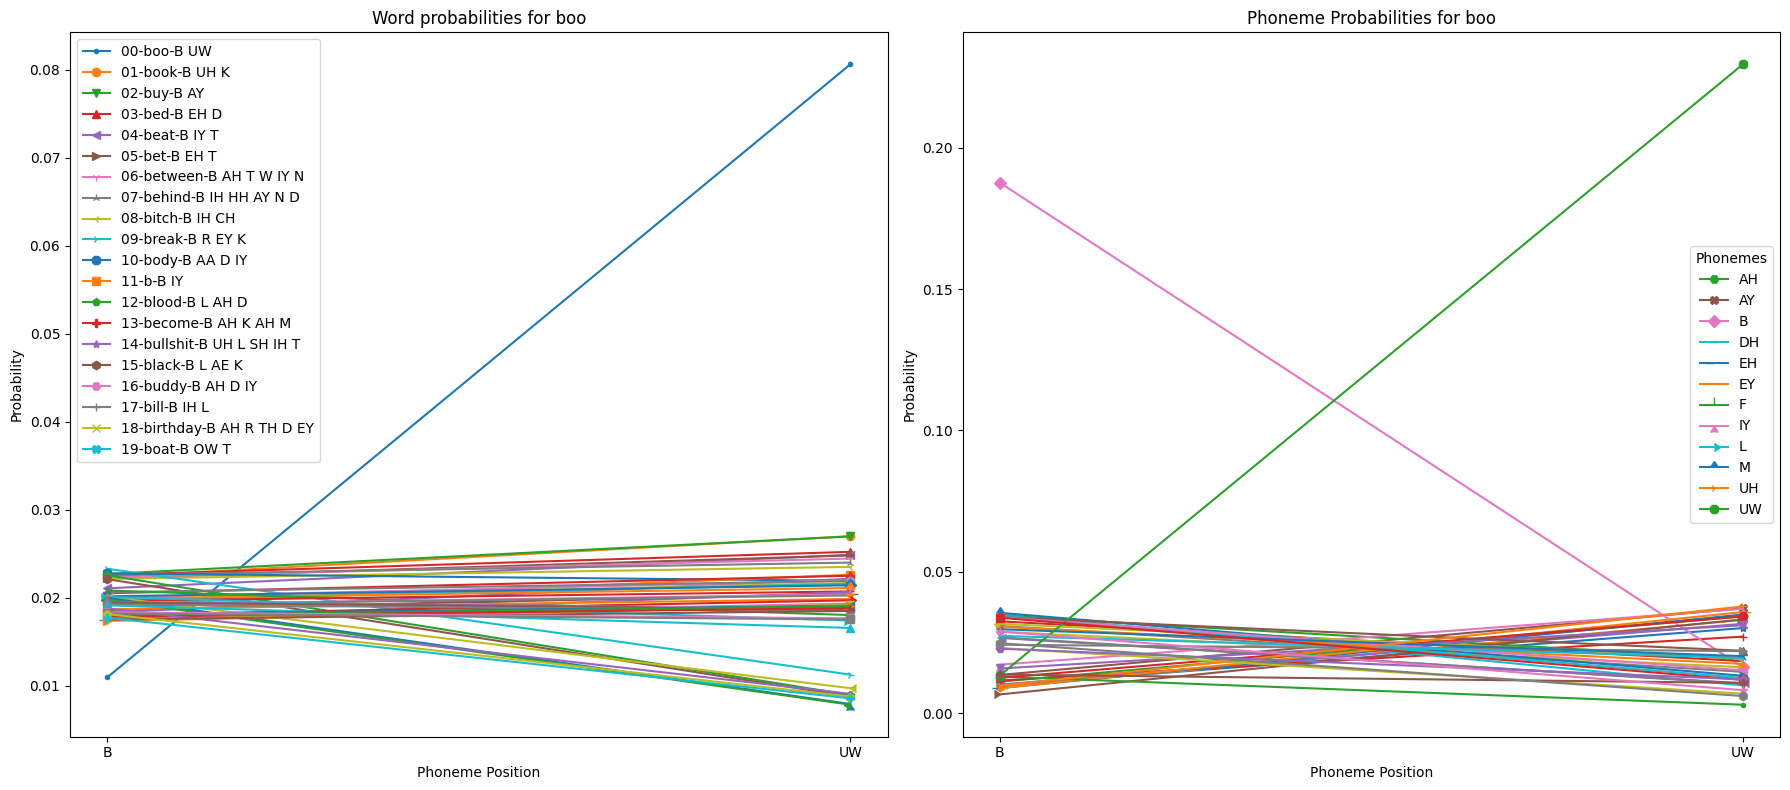

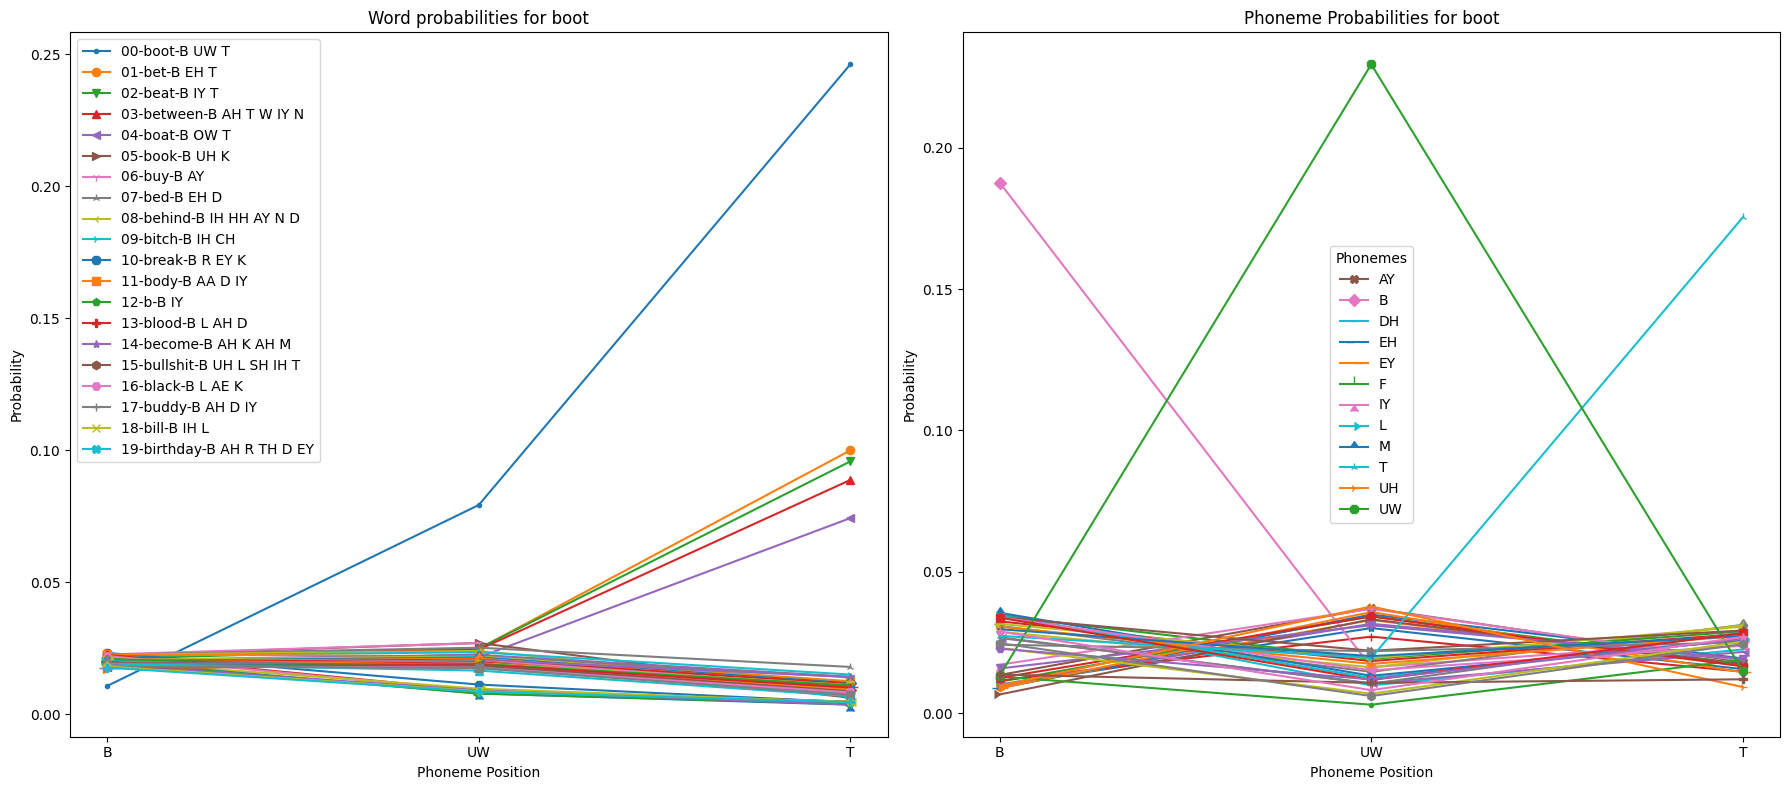

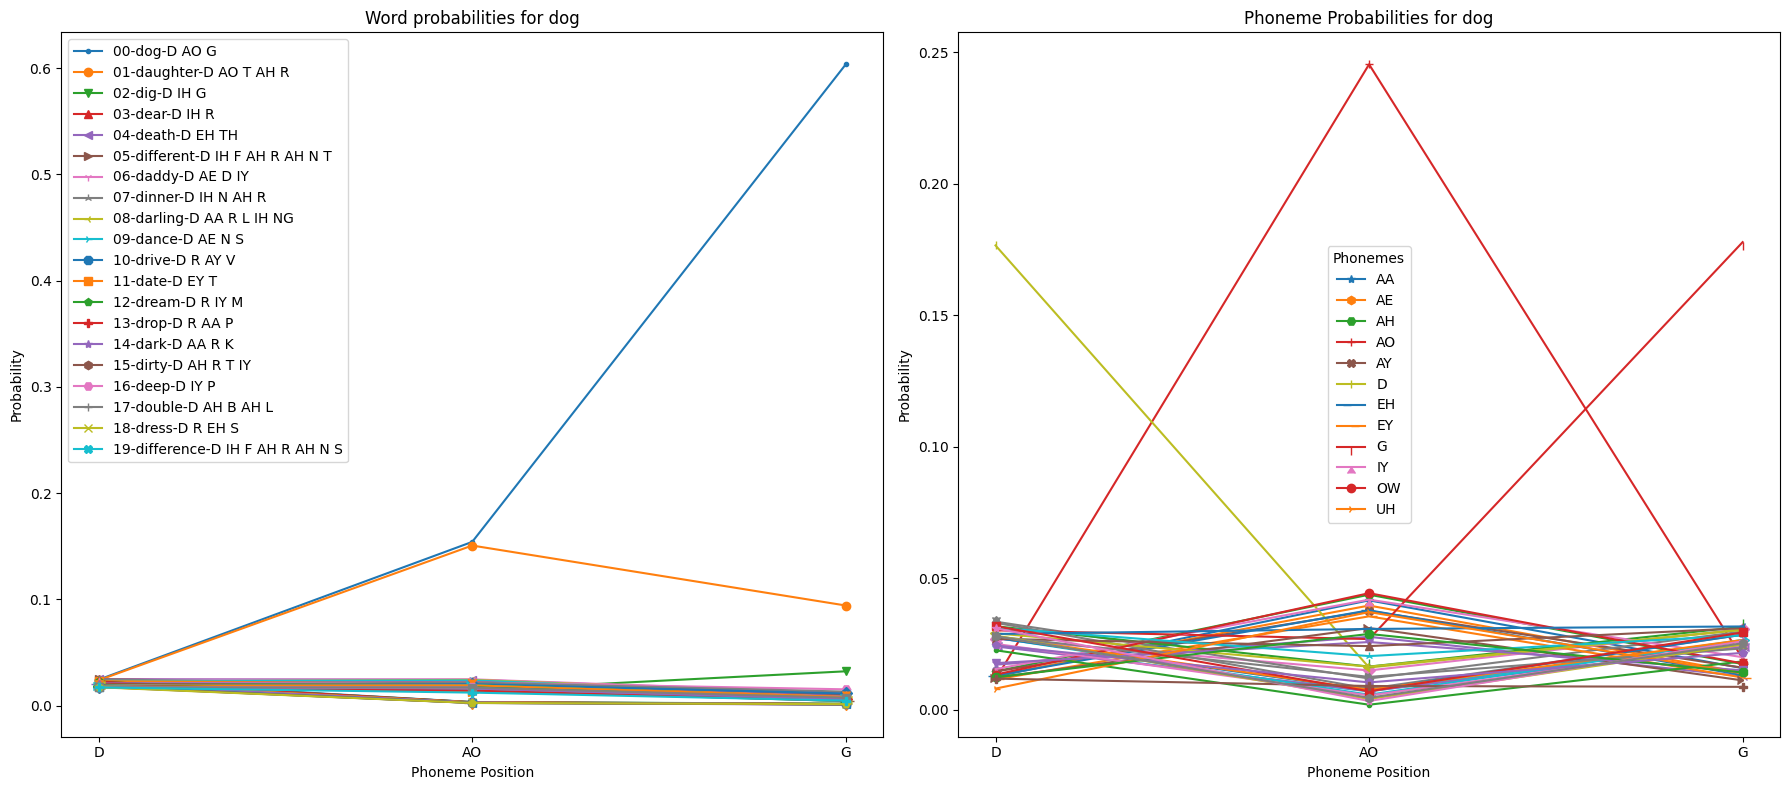

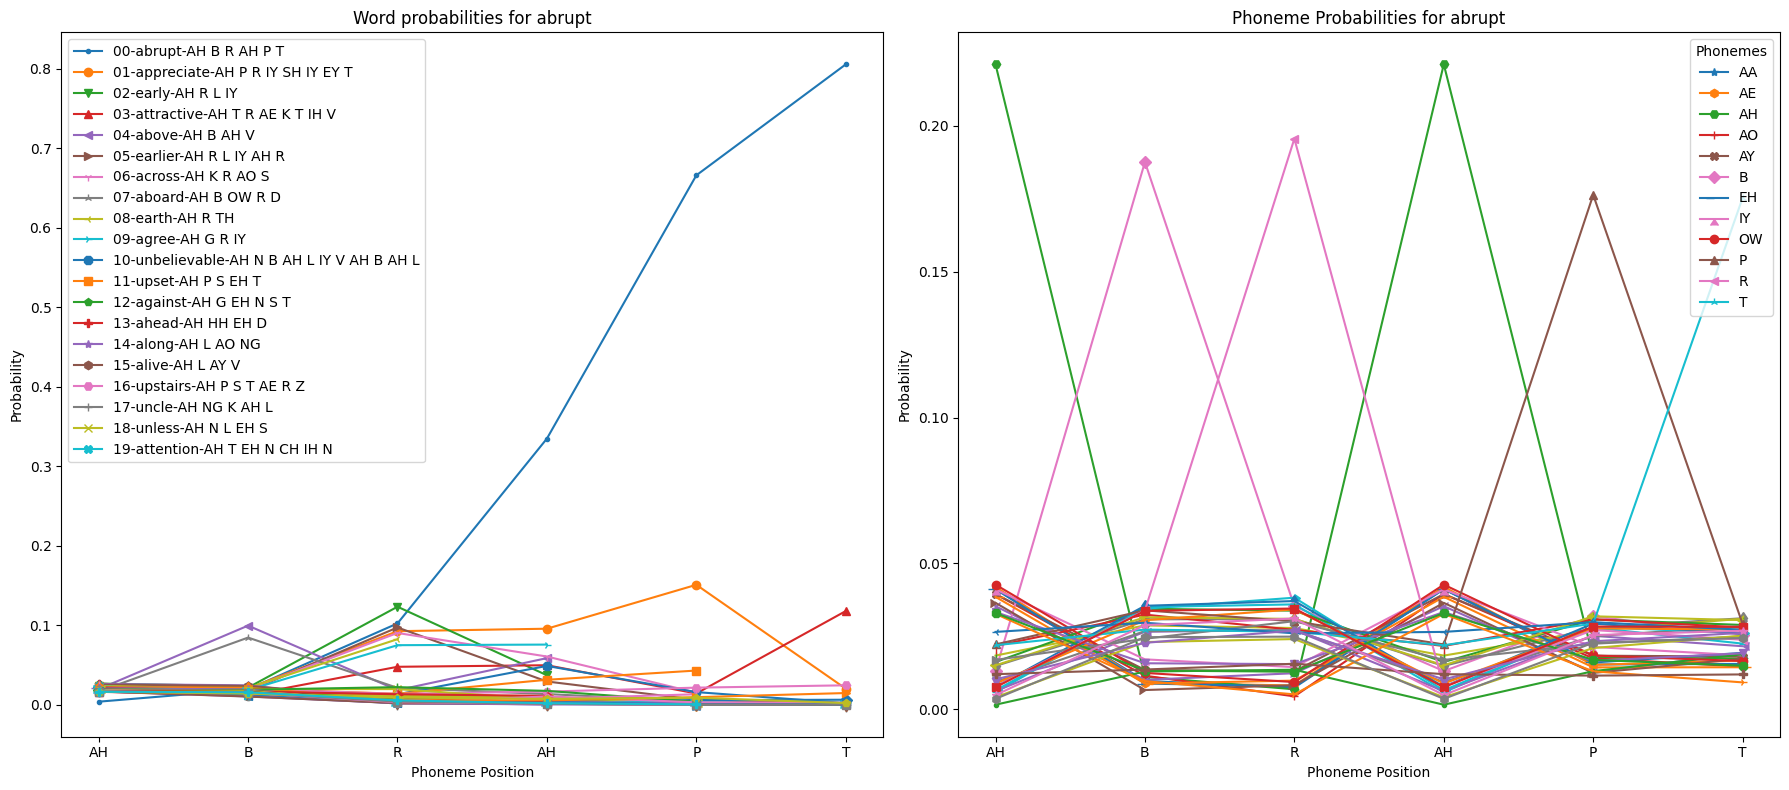

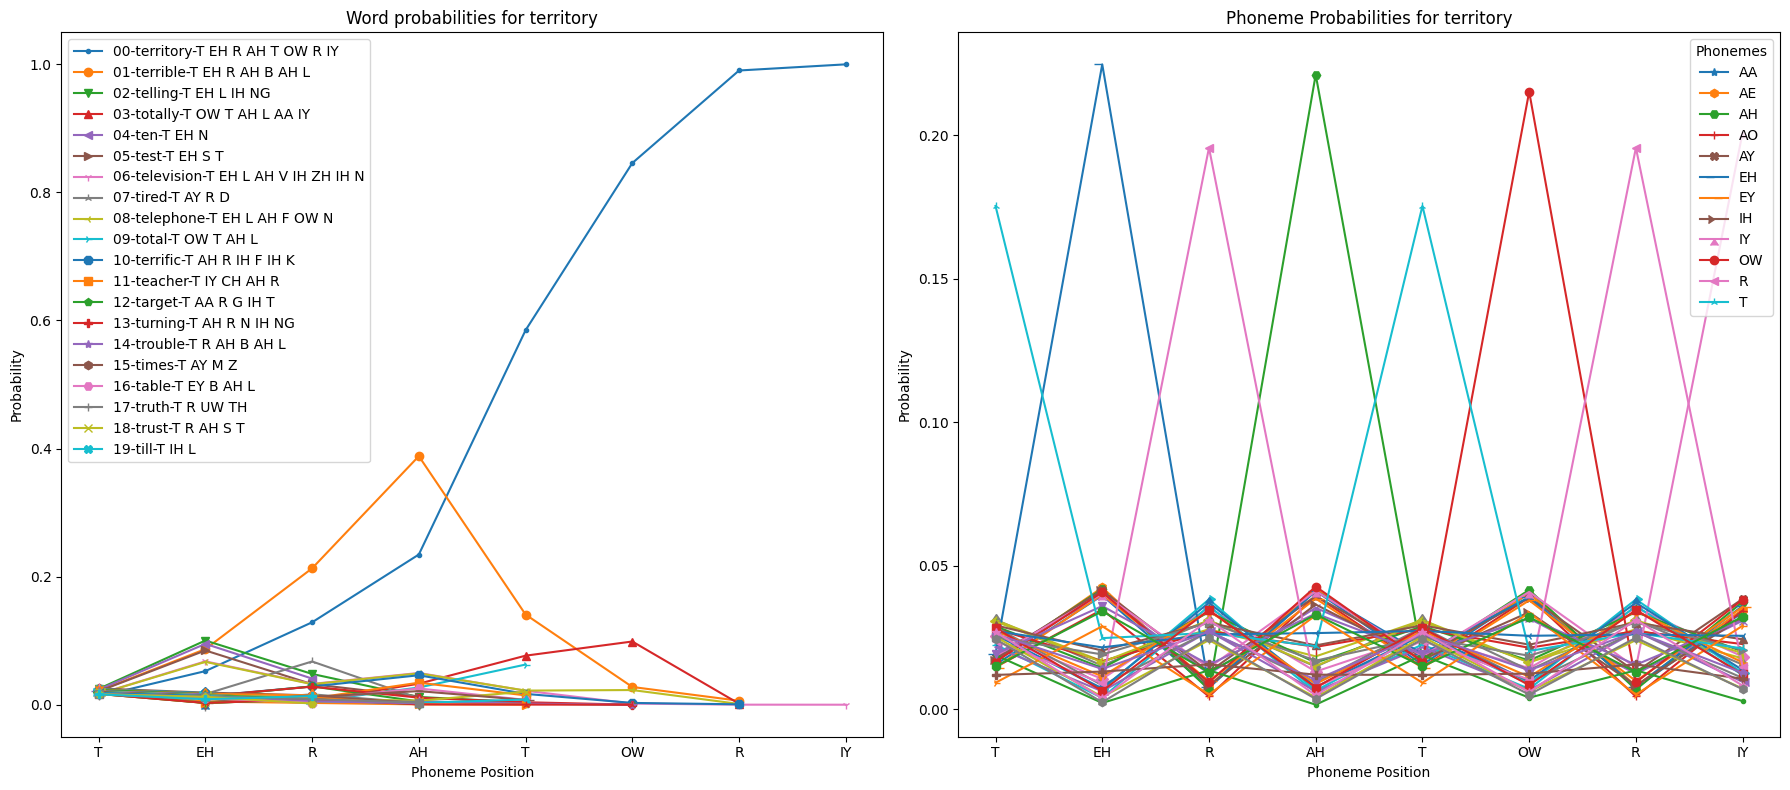

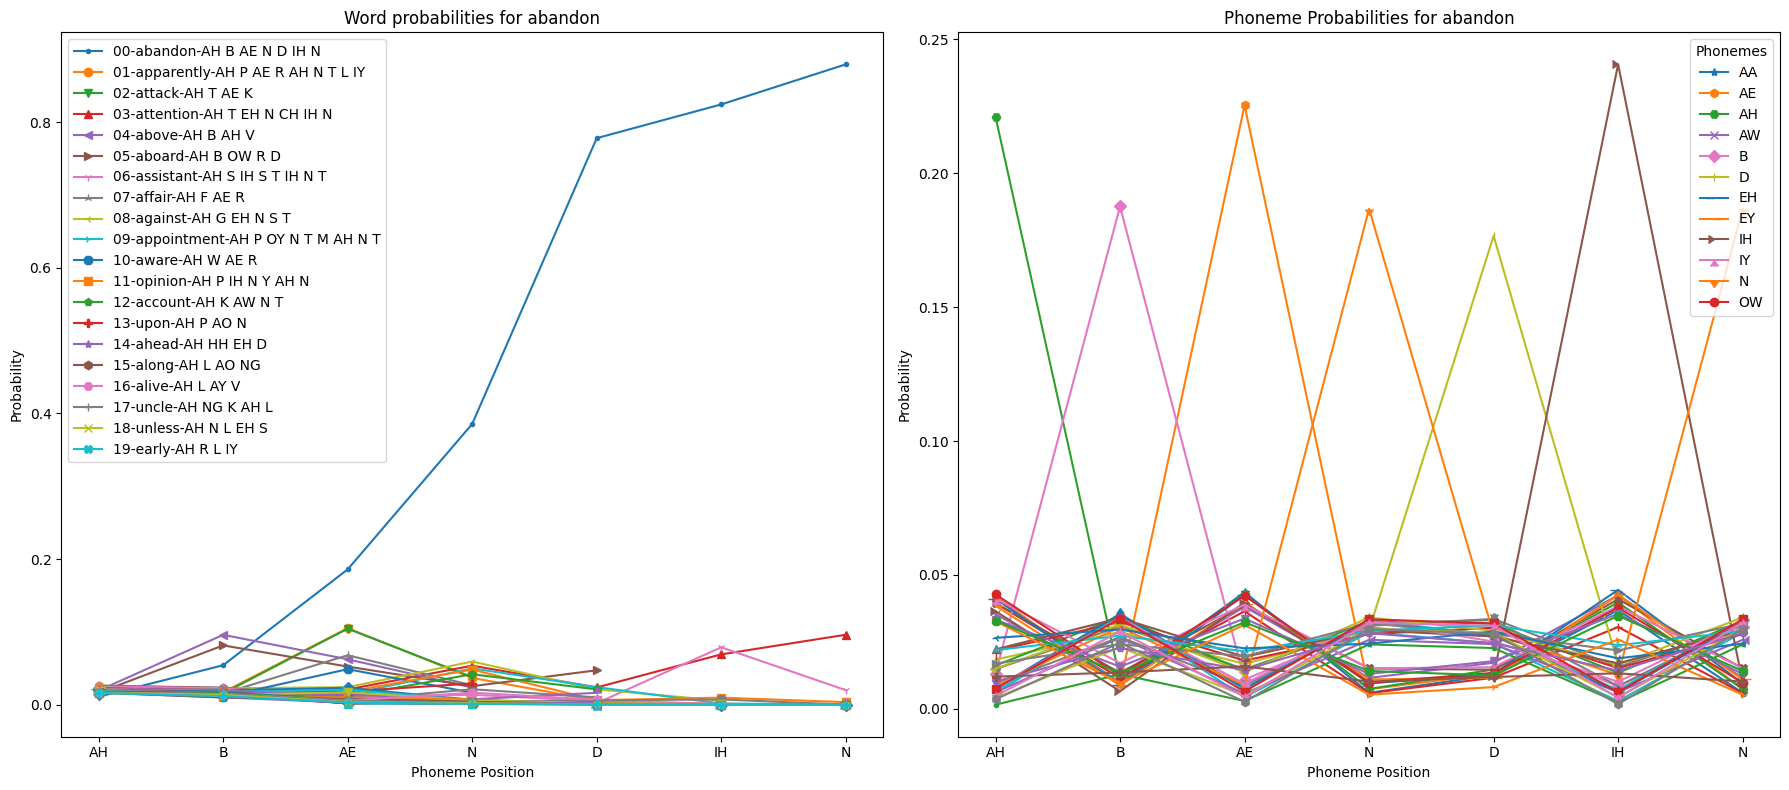

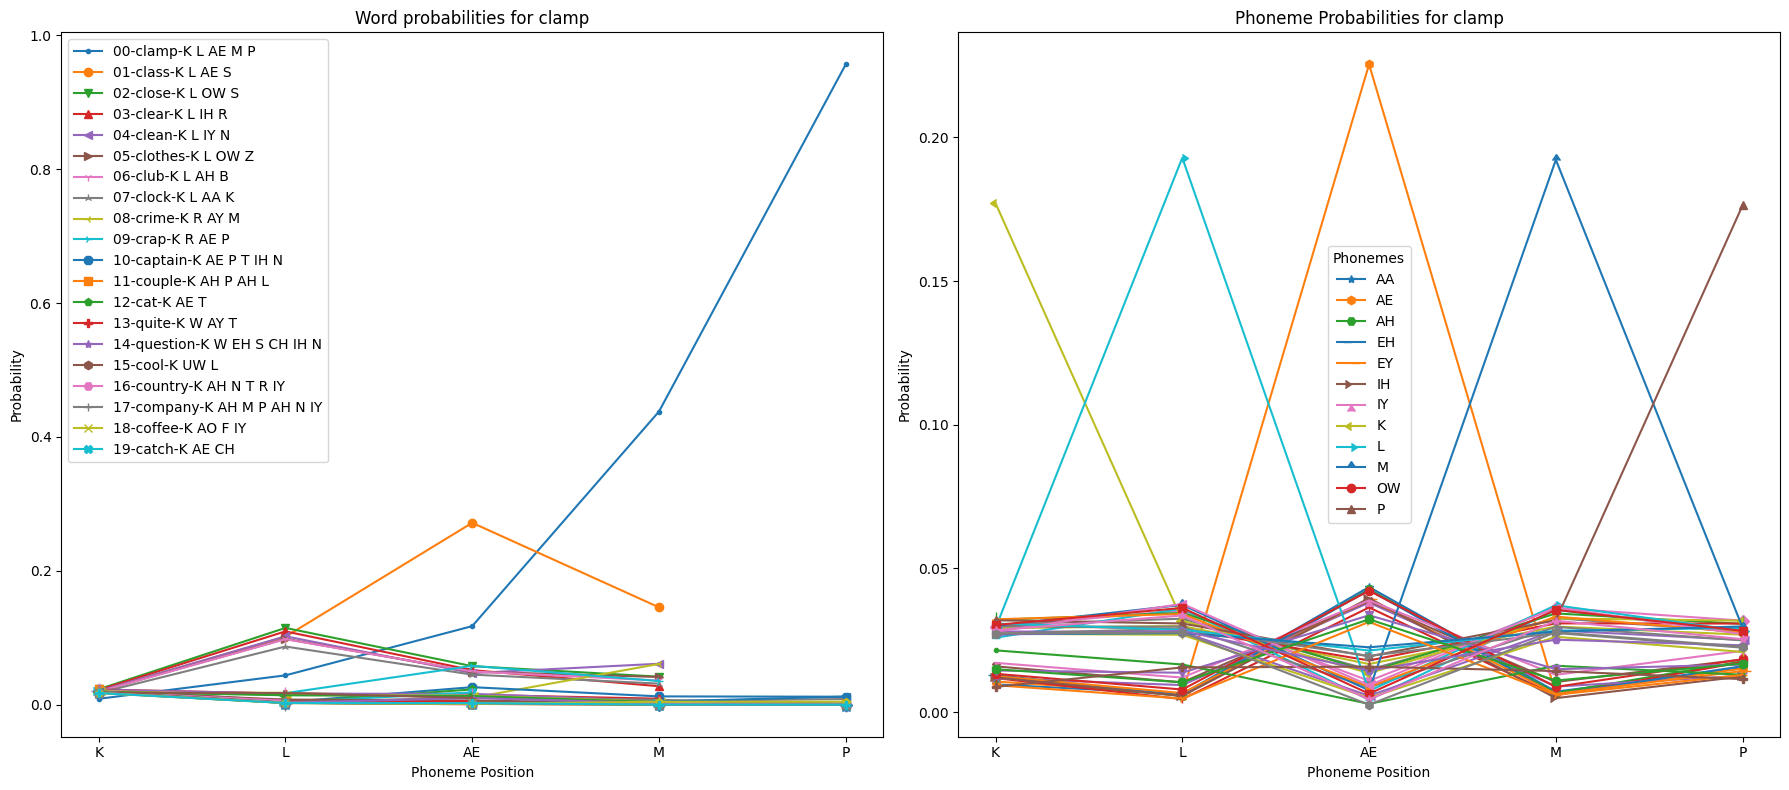

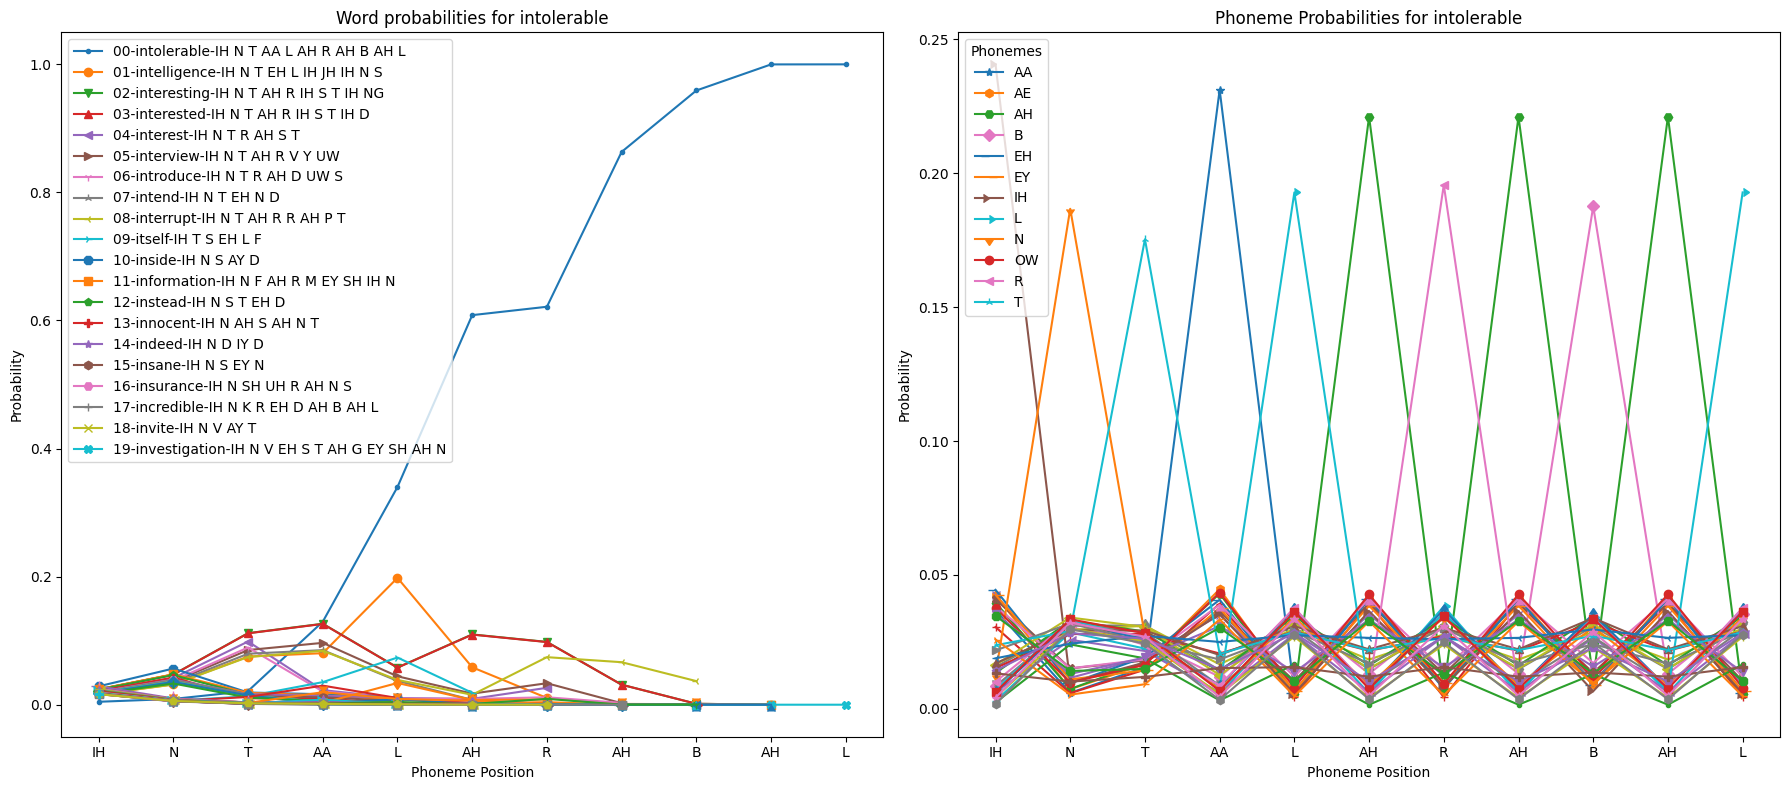

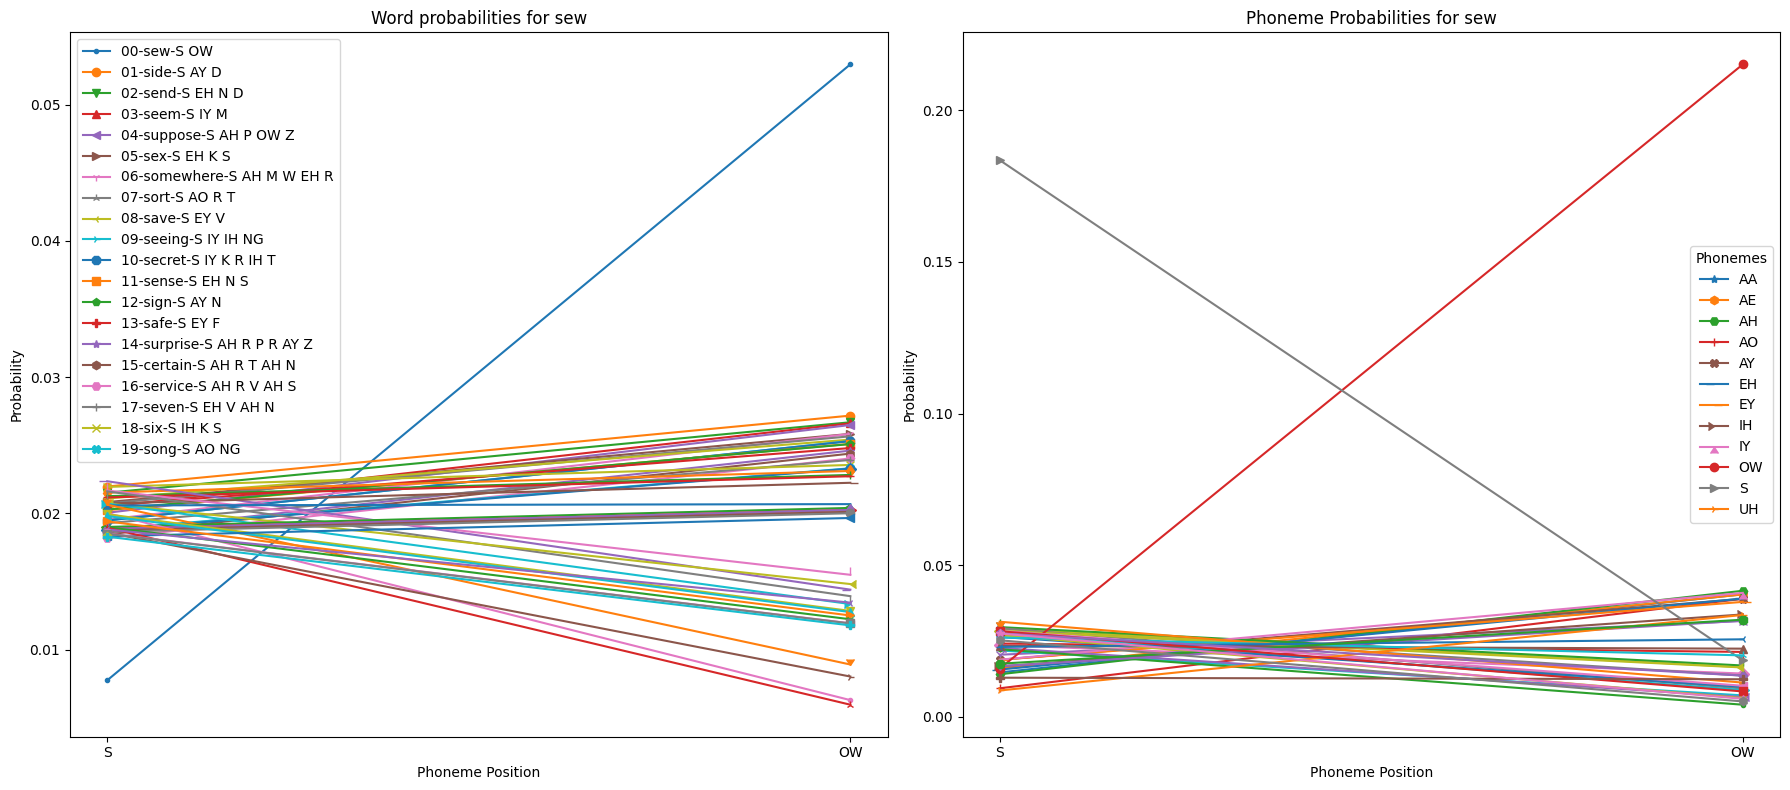

In [41]:
# Example usage:
word_list = ['boo', 'boot', 'go', 'dog', 'abrupt', 'territory', 'abandon', 'clamp', 'intolerable', 'sew']
aggregated_word_results, aggregated_phoneme_results = run_simulations(word_list, lexicon_df, 
                                                                      normalized_cosine_sim_df, phoneme_prob_dict)
plot_simulation_result(aggregated_word_results, aggregated_phoneme_results)

--- Starting simulation of word bickering	... Time for simulation: 0.292741 seconds
--- Starting simulation of word tail	... Time for simulation: 0.248737 seconds
--- Starting simulation of word tale	... Time for simulation: 0.248670 seconds
--- Starting simulation of word boo	... Time for simulation: 0.246198 seconds
--- Starting simulation of word sew	... Time for simulation: 0.253047 seconds


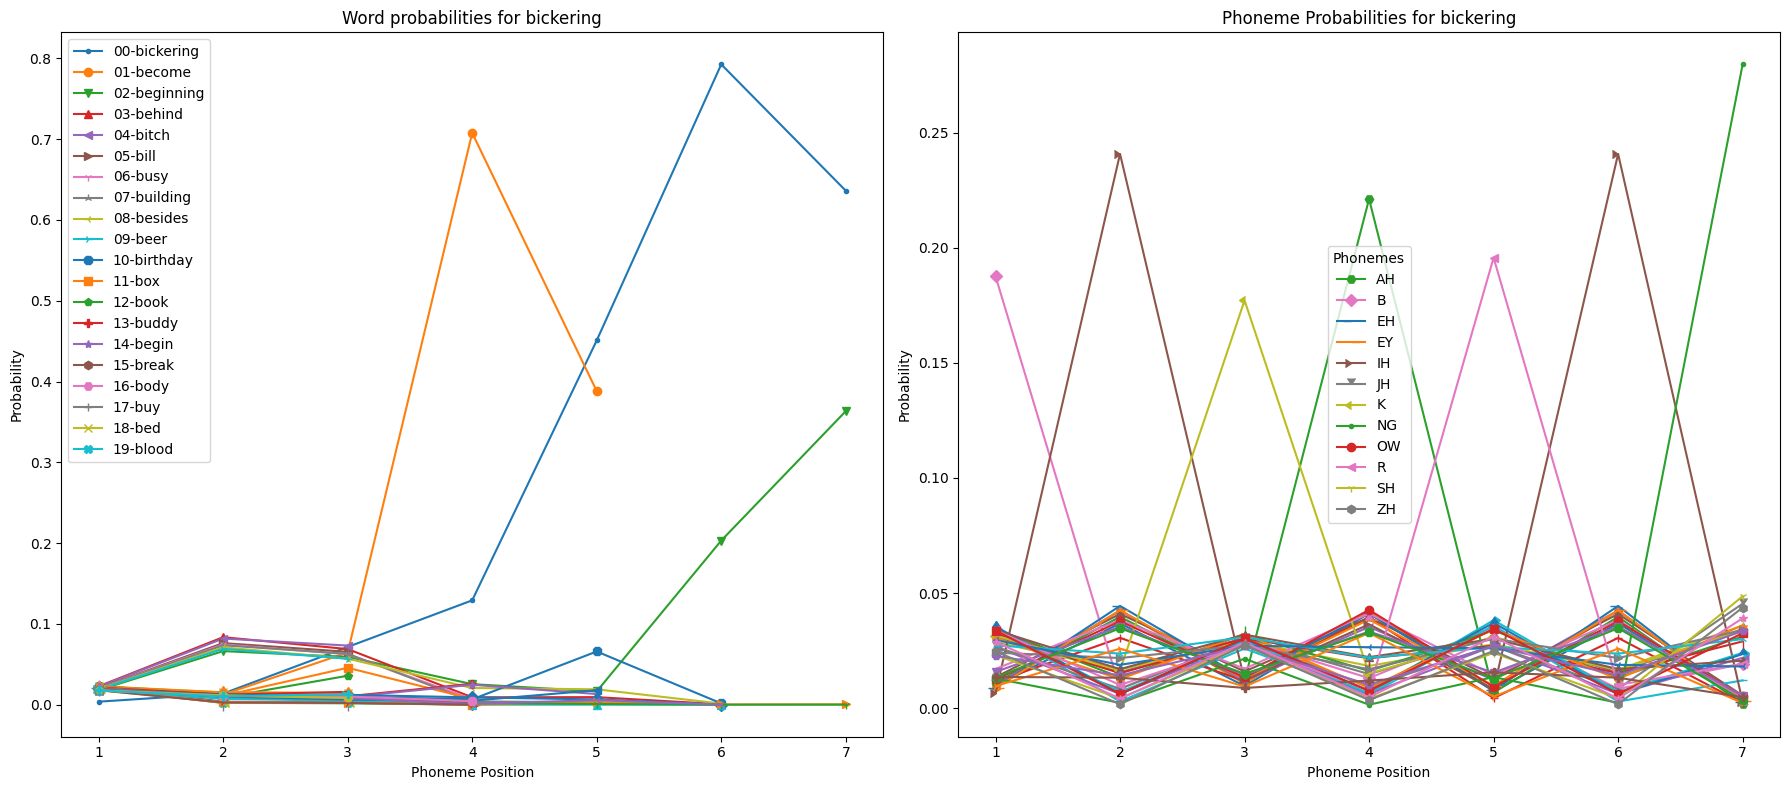

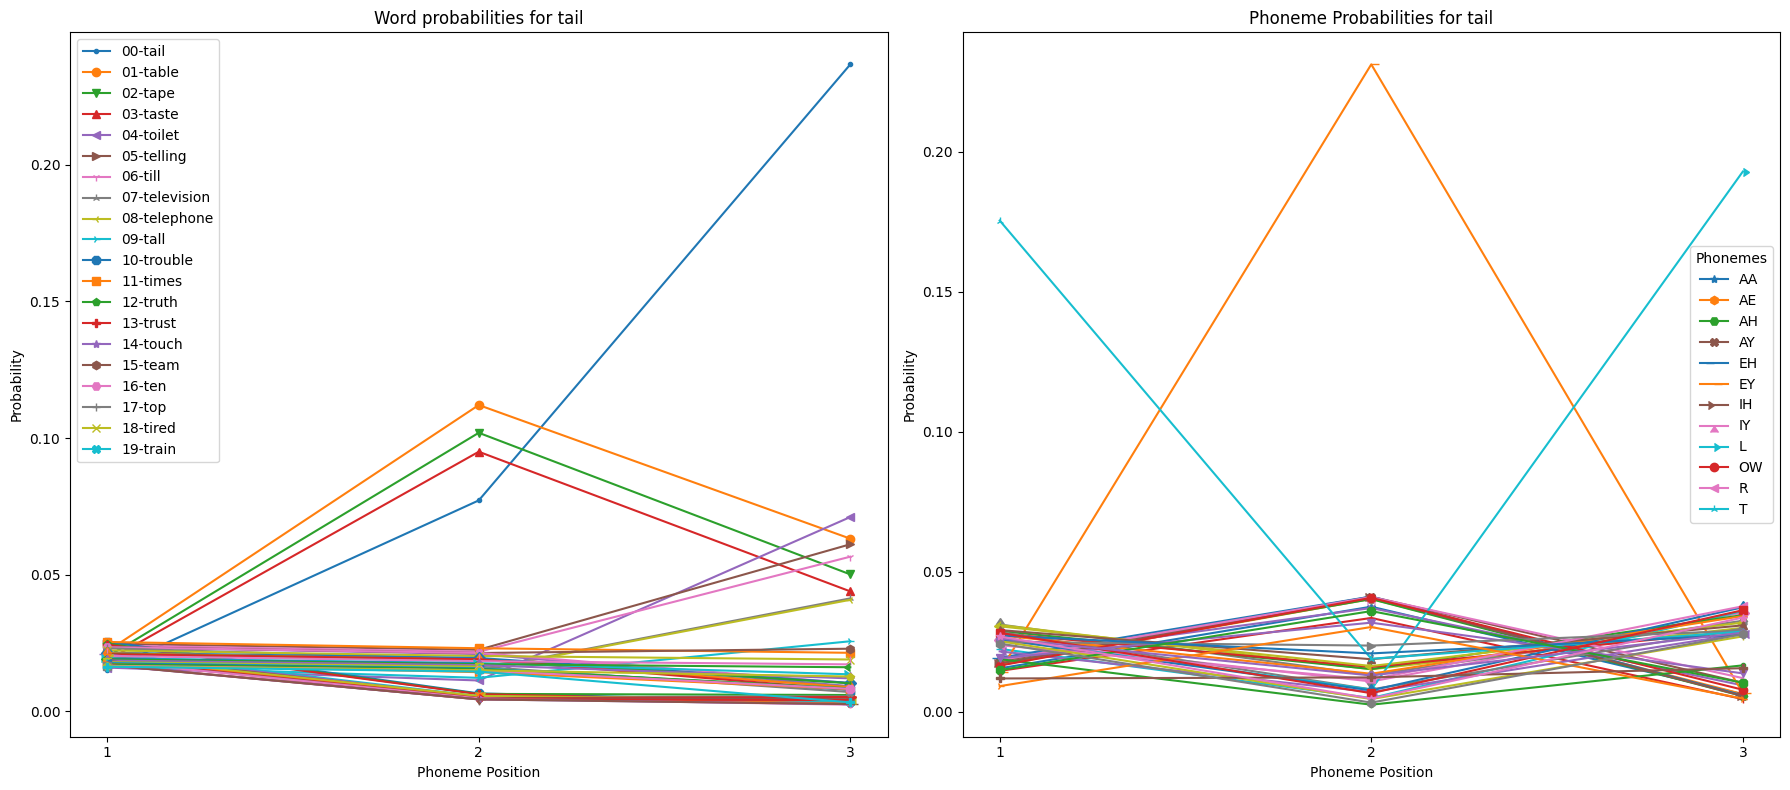

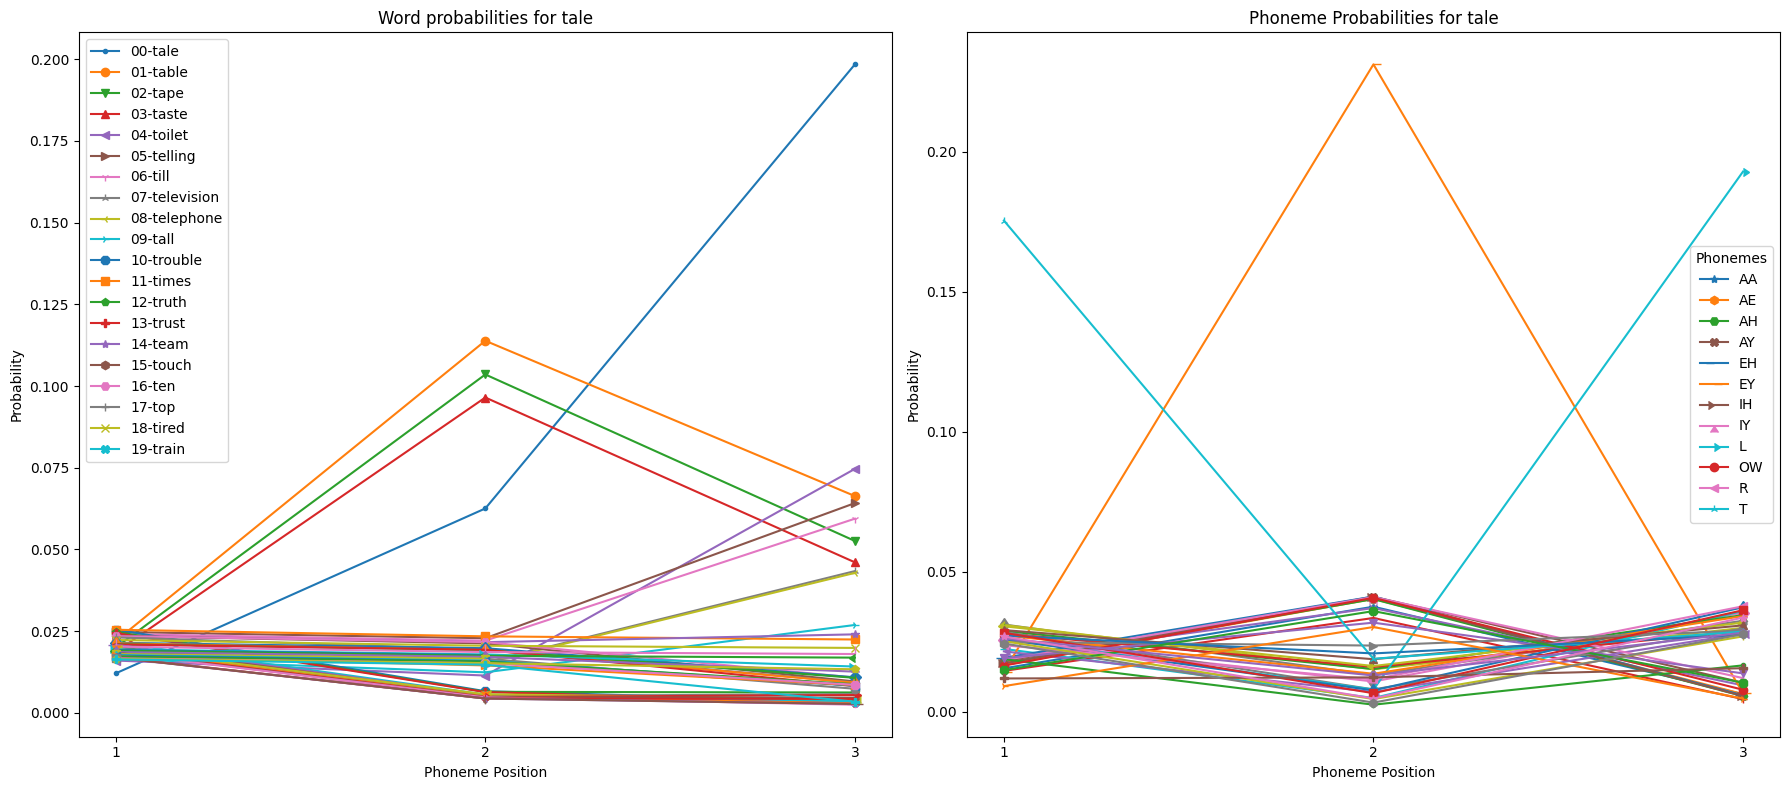

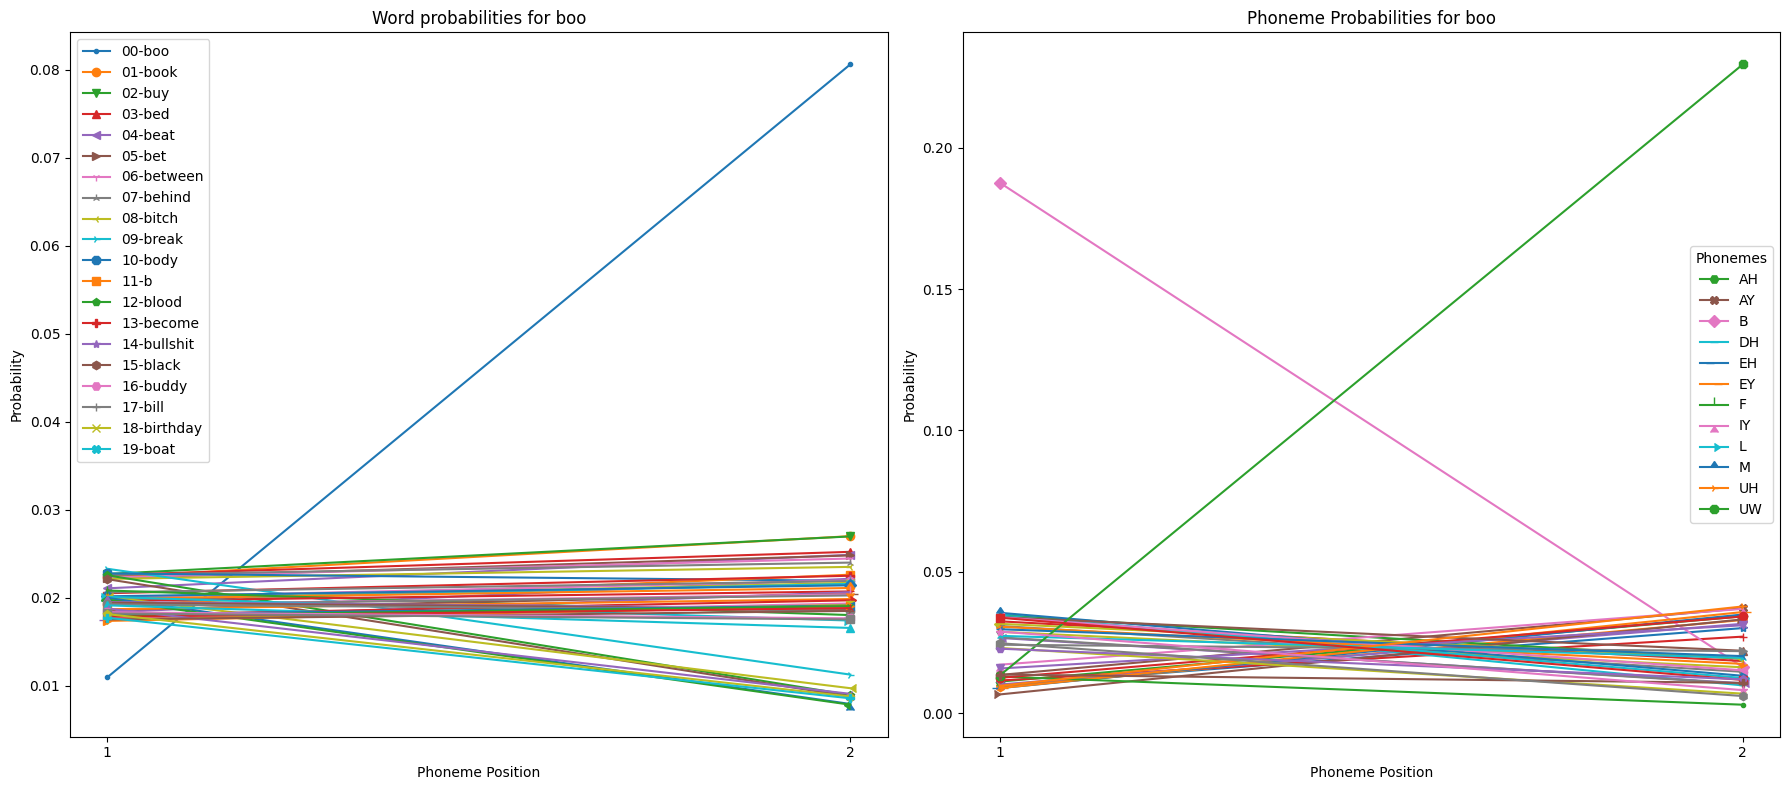

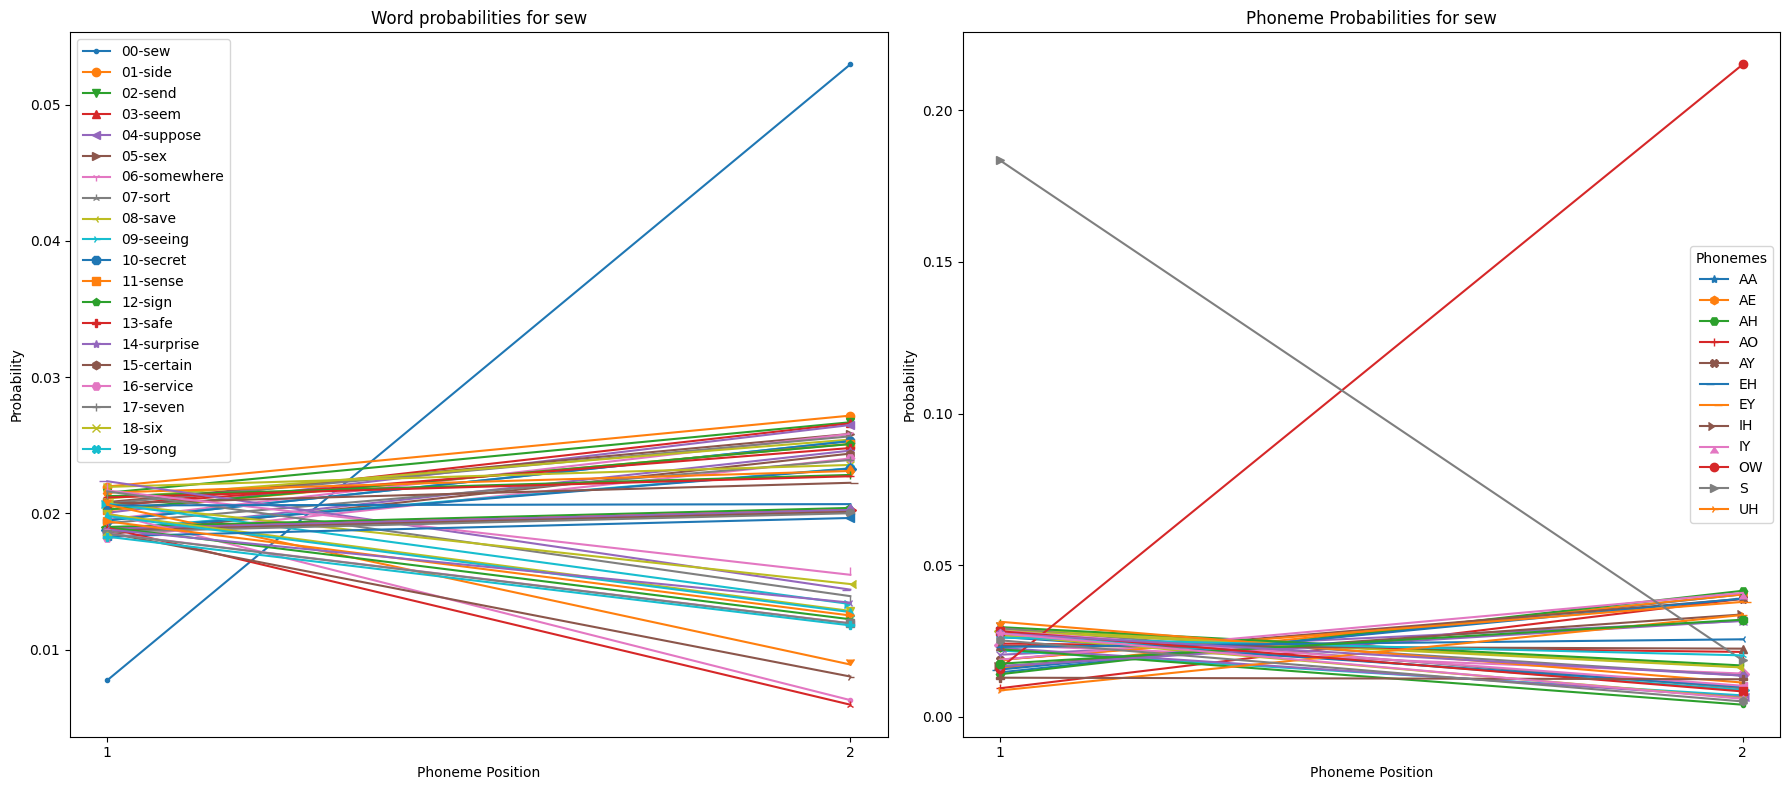

In [34]:

word_list = ['tail', 'tale', 'boo', 'boat', 'cat', 'category', 'vernacular', 'rain', 'rainy', 'chew', 'cardinal', 'zodiacal']
word_list = ['bickering', 'tail', 'tale', 'boo', 'sew', 'so']
# Example usage:
# word_list = ['cat', 'dog', 'abrupt', 'territory', 'abandon', 'clamp', 'intolerable', 'go']
aggregated_word_results, aggregated_phoneme_results = run_simulations(word_list, lexicon_df, normalized_cosine_sim_df, 
                                                                      phoneme_prob_dict)
plot_simulation_result(aggregated_word_results, aggregated_phoneme_results, full_scale=False)

# Lab report

1. Write a brief summary of the Bayesian approach we are using here (3-4 sentences).

2. Examine the plots above. What observations can you make? Does it seem the system works well? 

3. Replot, but set `full_scale=True`, which will make the Y axes go from 0 to 1 (see code below, which you can enter in a new code cell). Now review the new plots. What kinds of changes do you see? Are there any things that seem problematic?

```python
plot_simulation_result(aggregated_word_results, aggregated_phoneme_results, full_scale=True)
```

4. What are some other words you think might be interesting to examine? Run new simulations with your words. Replace the word list below with the words you want to examine and copy the 3 lines of code into a new code cell. Run it. Include the code lines in your report. Explain why you chose the words you did, and report some observations about the results. (Also, if you scroll to the bottom of this notebook, there's a code snippet a student developed last year that will randomly pick 8 words -- this is a nice way to explore words you might not have thought to test.)

```python
# change the words in word list; you can make the list longer or shorter. Try at least 4 words.
word_list = ['cat', 'dog', 'abrupt', 'territory', 'abandon', 'clamp', 'intolerable', 'go']
aggregated_word_results, aggregated_phoneme_results = run_simulations(word_list, lexicon_df, normalized_cosine_sim_df, phoneme_prob_dict)
plot_simulation_result(aggregated_word_results, aggregated_phoneme_results, full_scale=True)
```
5. How could we decide if a simulation should be considered successful or not? That is, how can we assess whether the word has been correctly recognized? 

6. Do you see any problems with the results so far? List them, but also try to pair each problem with a possible solution -- something you could change in the simulations that might improve results.

#### Challenge questions -- optional

*PhD and honors students: do at least one of these. Everyone else -- you can do them for extra credit.*

7. *Programming challenge.* Write a function that takes a dataframe like `aggregated_word_results` and assesses whether the word was recognized correctly or not, using the approach you came up with for question 5. 

<!---8. *Programming challenge.* Write code (does not have to be a function) that takes a random sample of words from the lemmalex lexicon and then run simulations on that list of words and make plots. Maybe just try getting this to work for 5 words initially. --->

8. *Theoretical challenge.* What are some aspects of spoken word recognition that are missing from our current approach? Consider the challenges from the Magnuson & Crinnion review. 

------
### An example improvement from last year

Choosing a random sample of words. The code below will run simulations with a different set of 8 randomly chosen words every time you run it. 

*Note that this occasionally throws an error; you can ignore it and just 'play' the cell again.*

--- Starting simulation of word preliminary	... Time for simulation: 0.263457 seconds
--- Starting simulation of word chandelier	... Time for simulation: 0.253705 seconds
--- Starting simulation of word kosher	... Time for simulation: 0.247908 seconds
--- Starting simulation of word freak	... Time for simulation: 0.252970 seconds
--- Starting simulation of word symptom	... Time for simulation: 0.255432 seconds
--- Starting simulation of word grimace	... Time for simulation: 0.254996 seconds
--- Starting simulation of word reorganize	... Time for simulation: 0.254250 seconds
--- Starting simulation of word adhesion	... Time for simulation: 0.250943 seconds


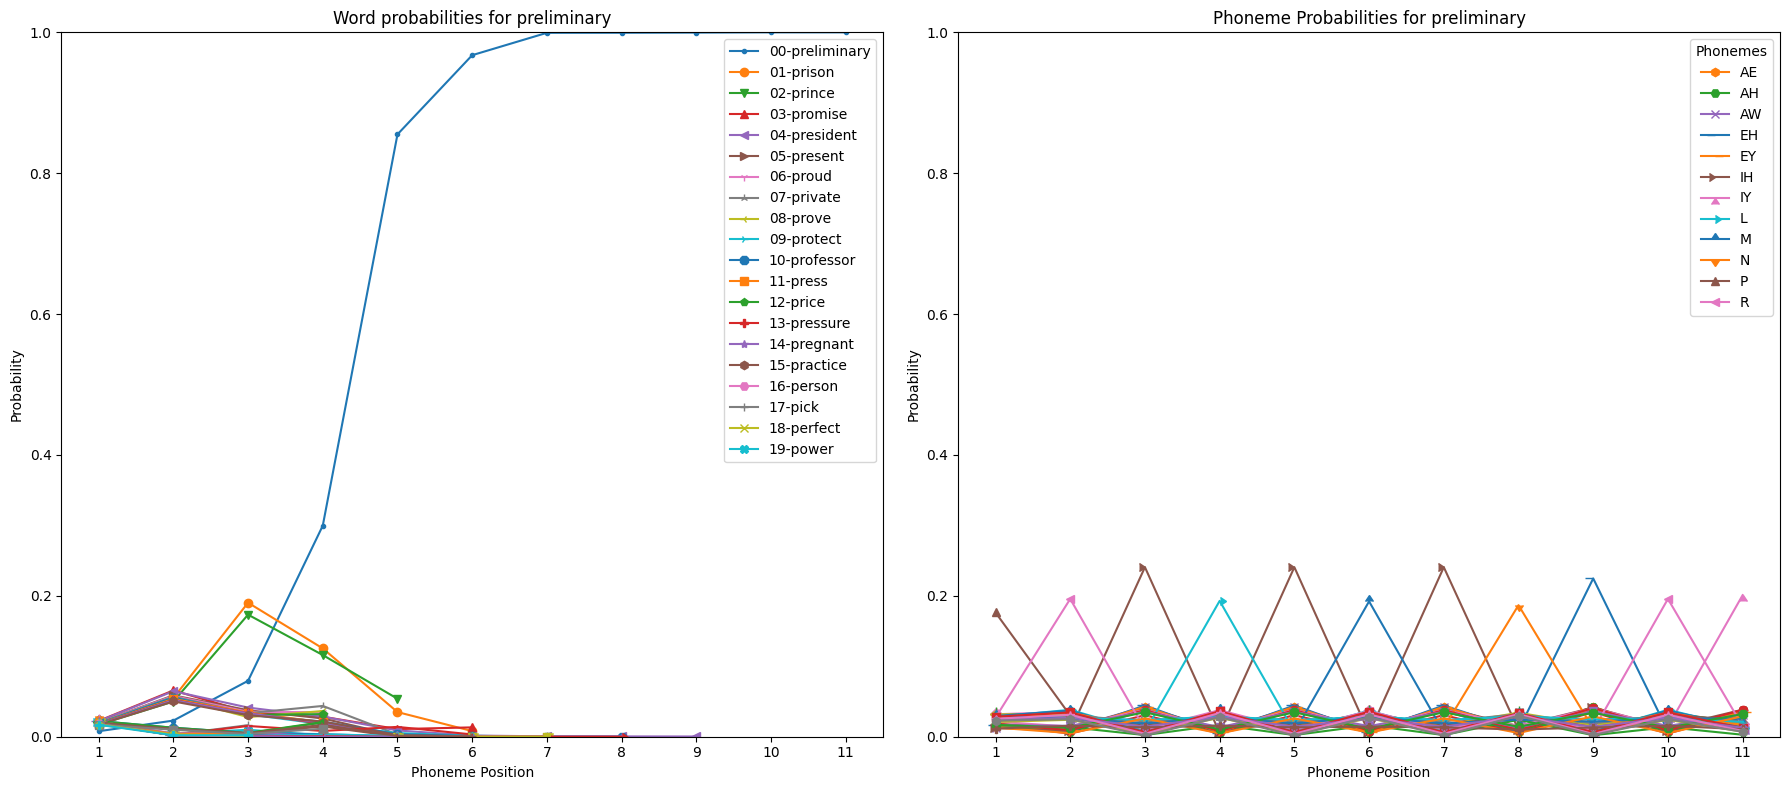

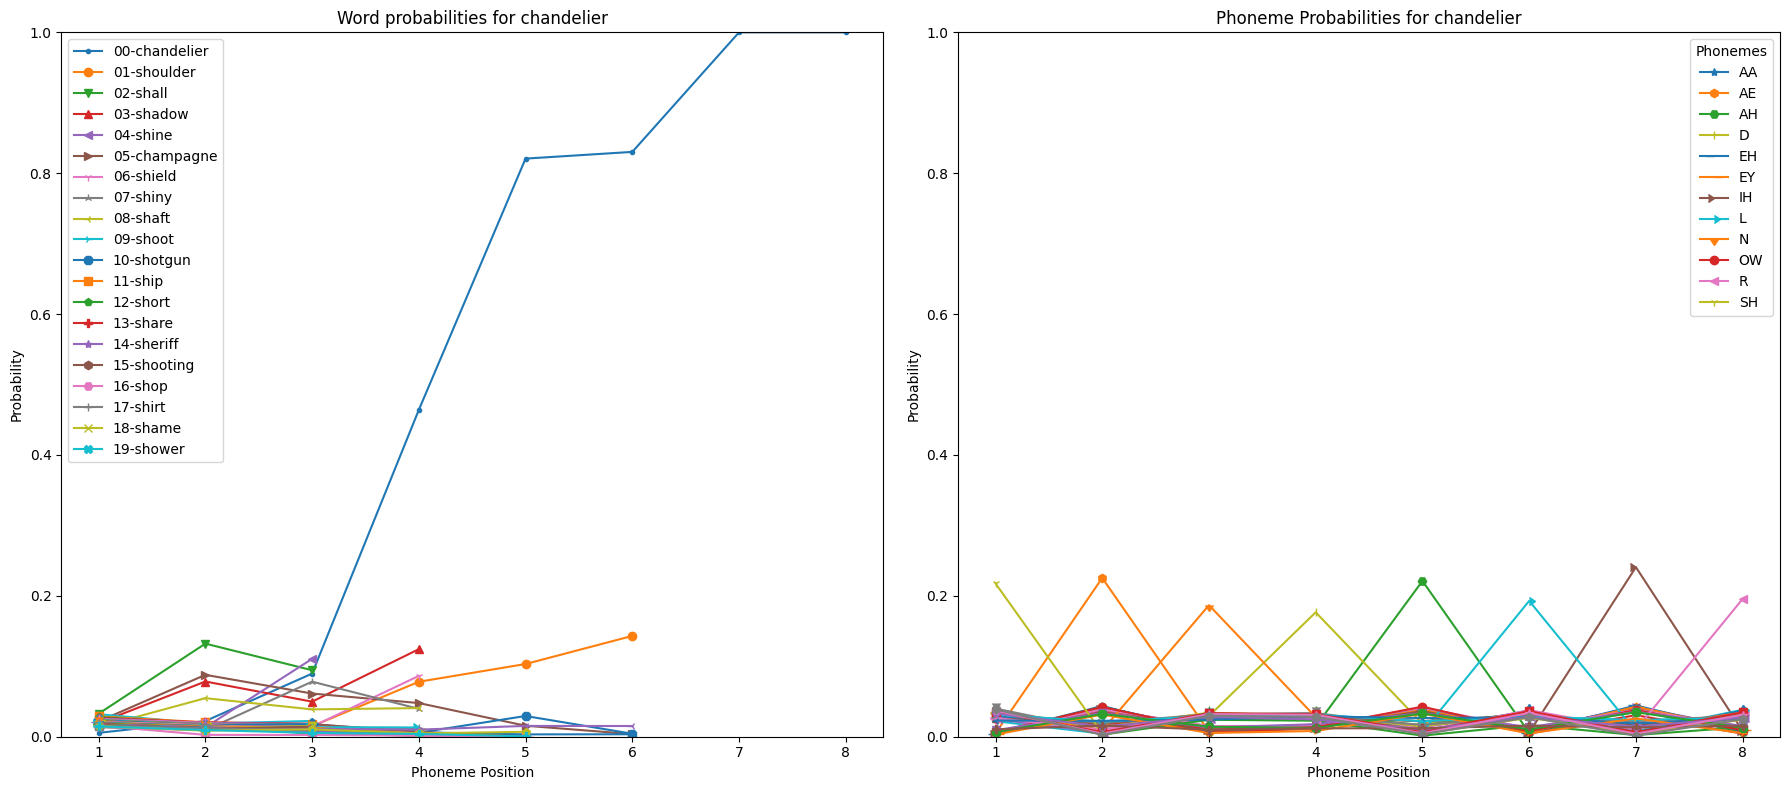

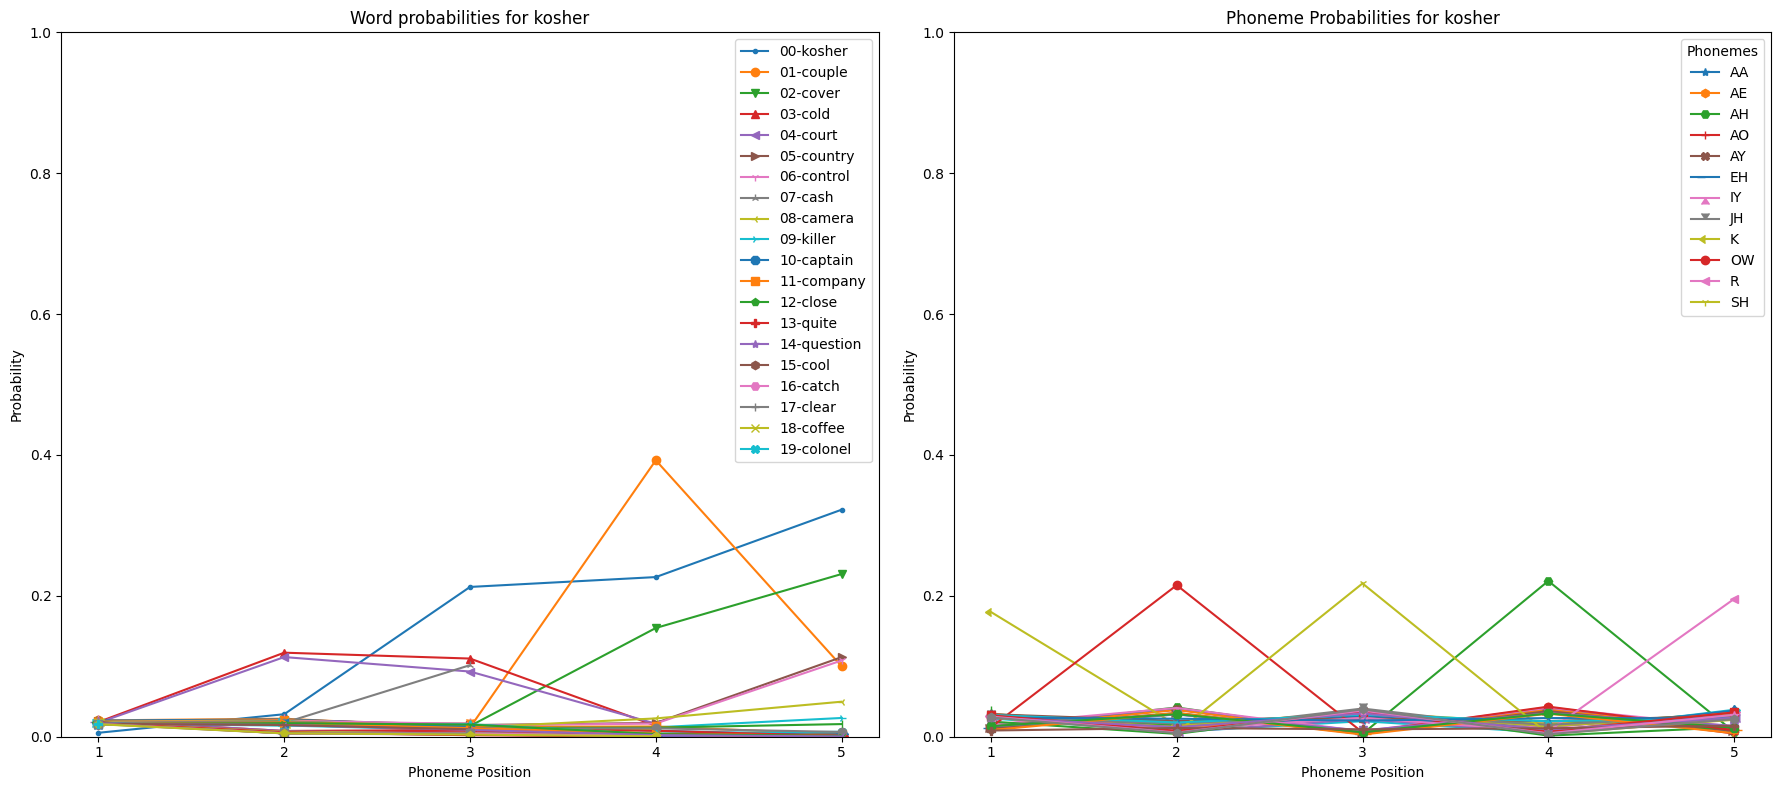

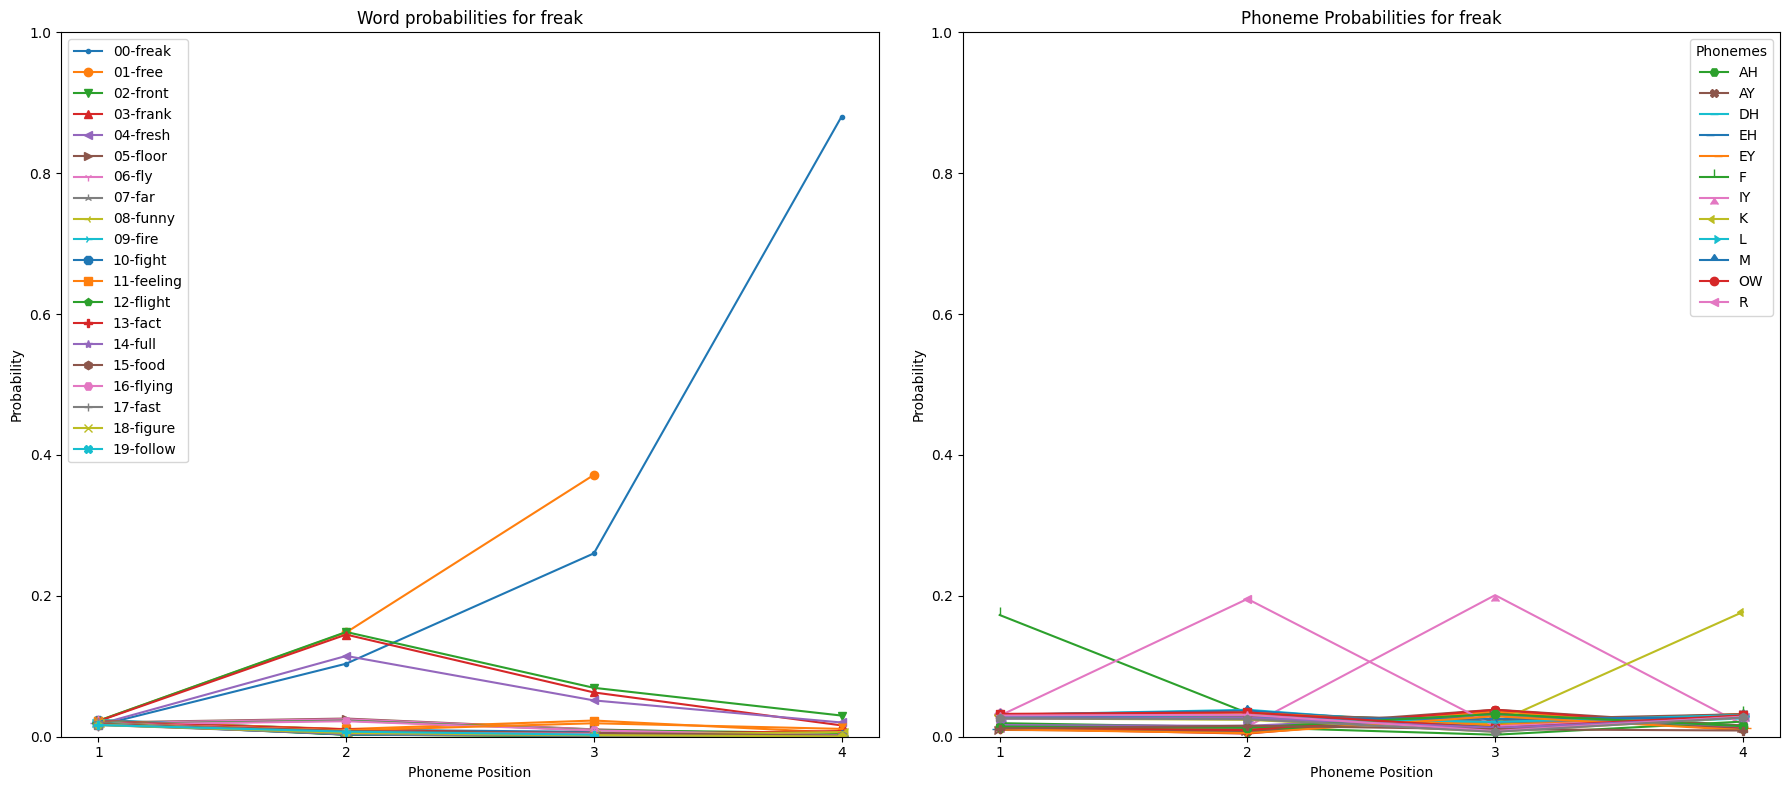

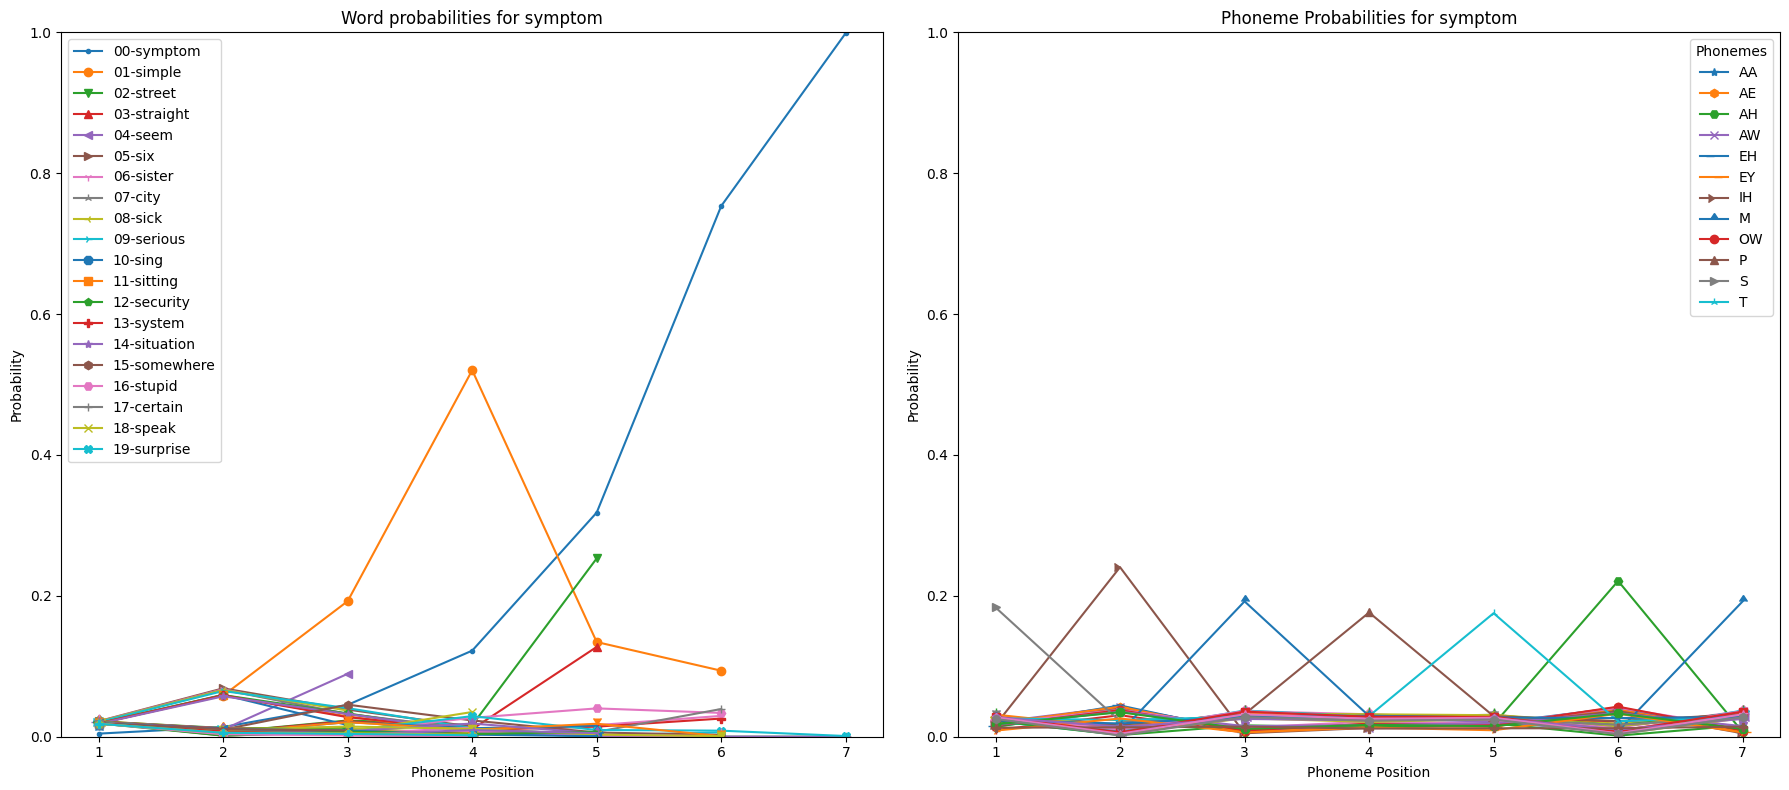

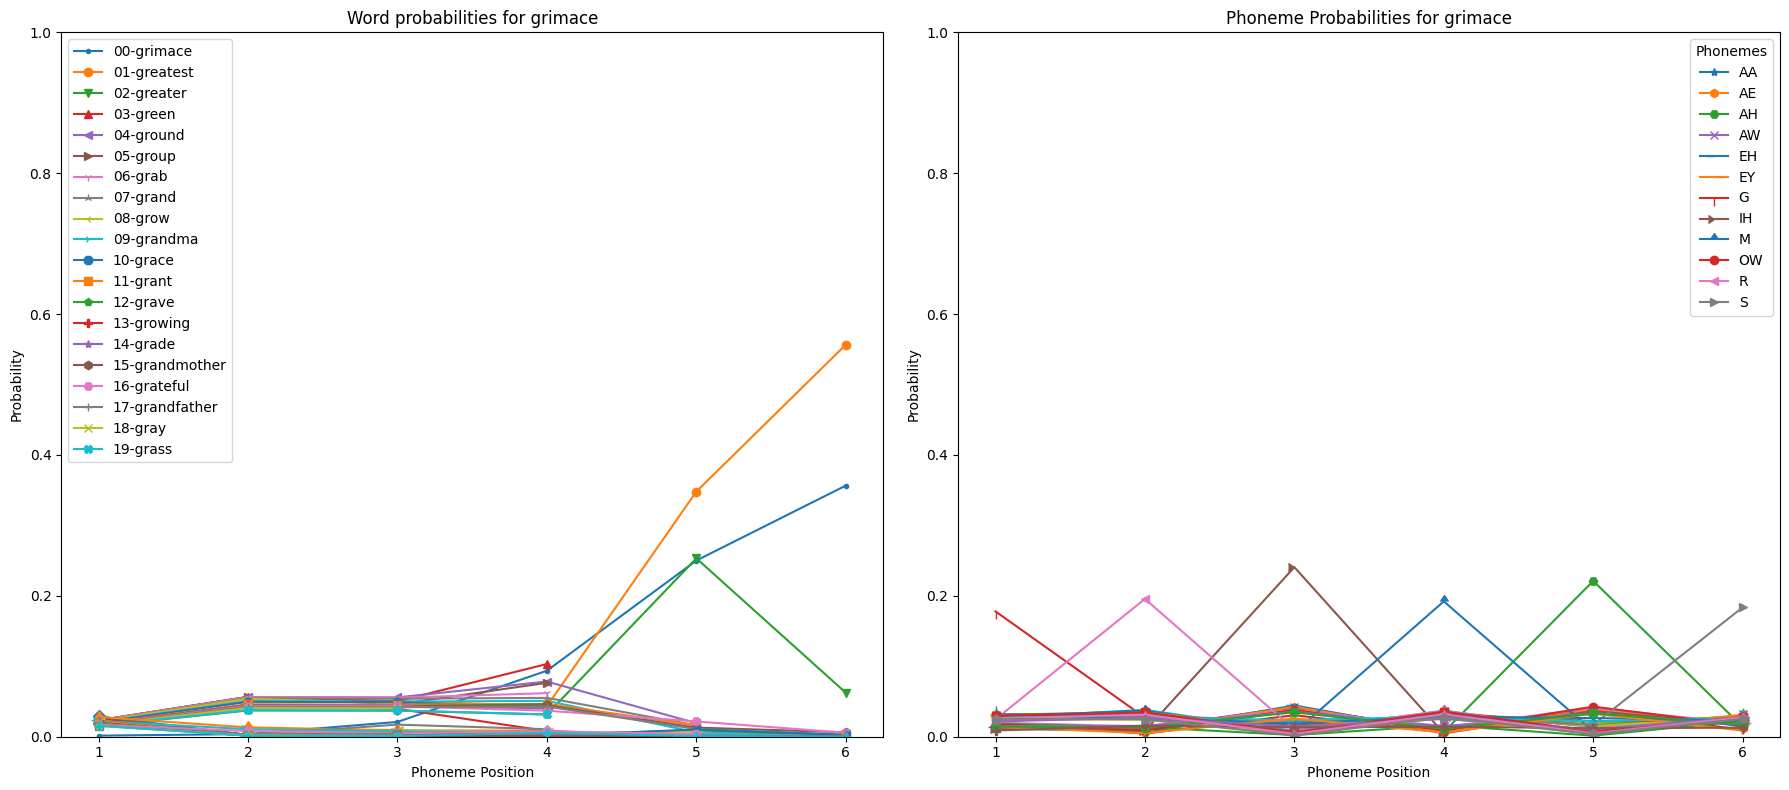

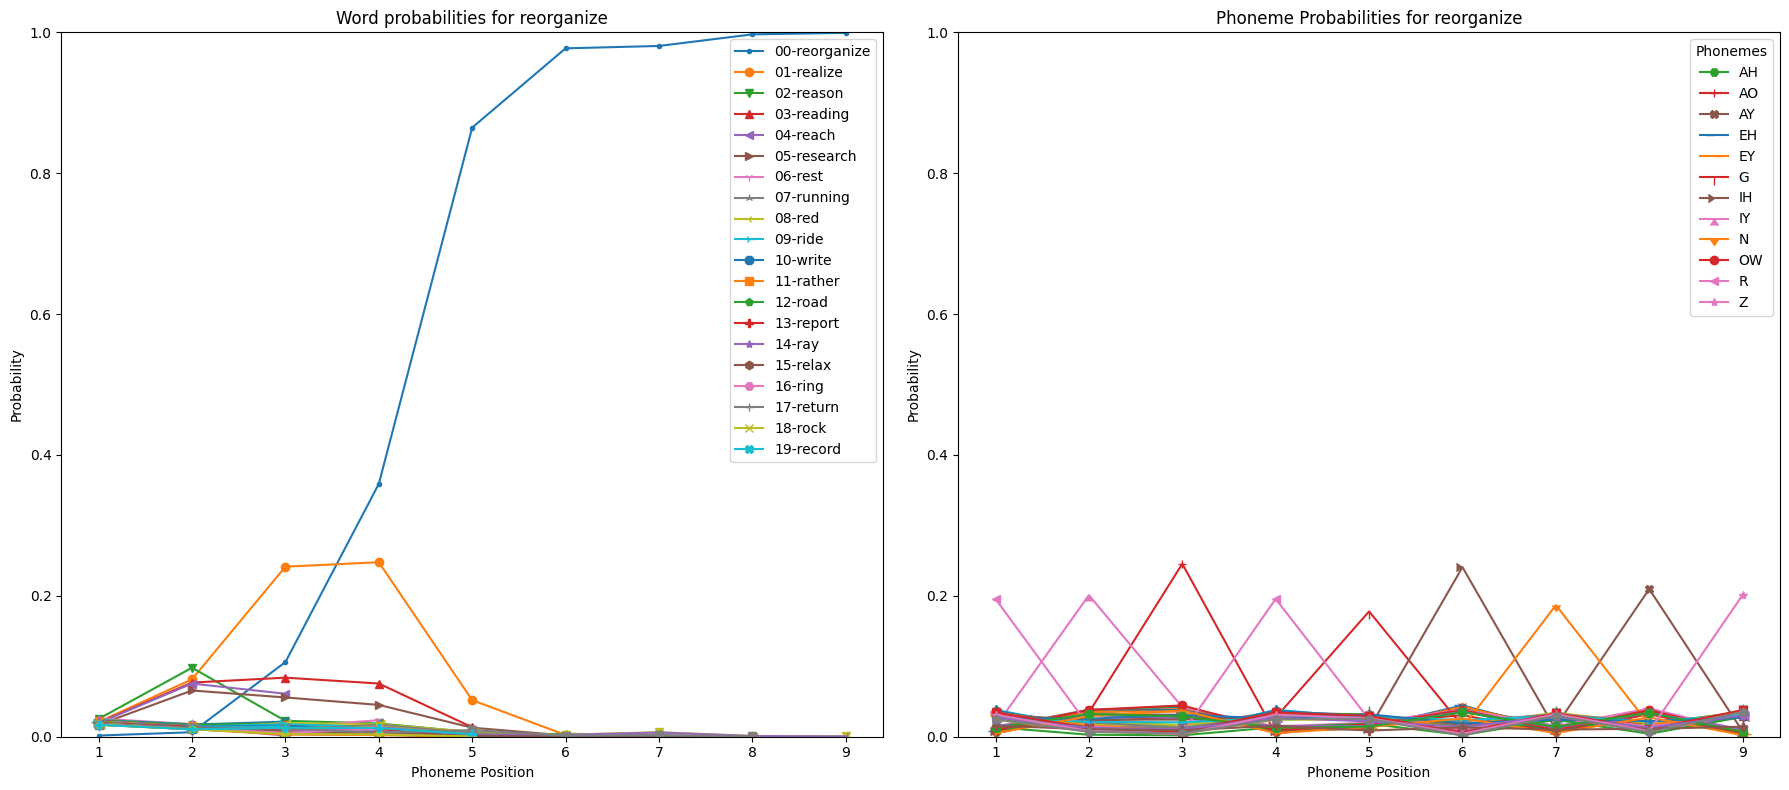

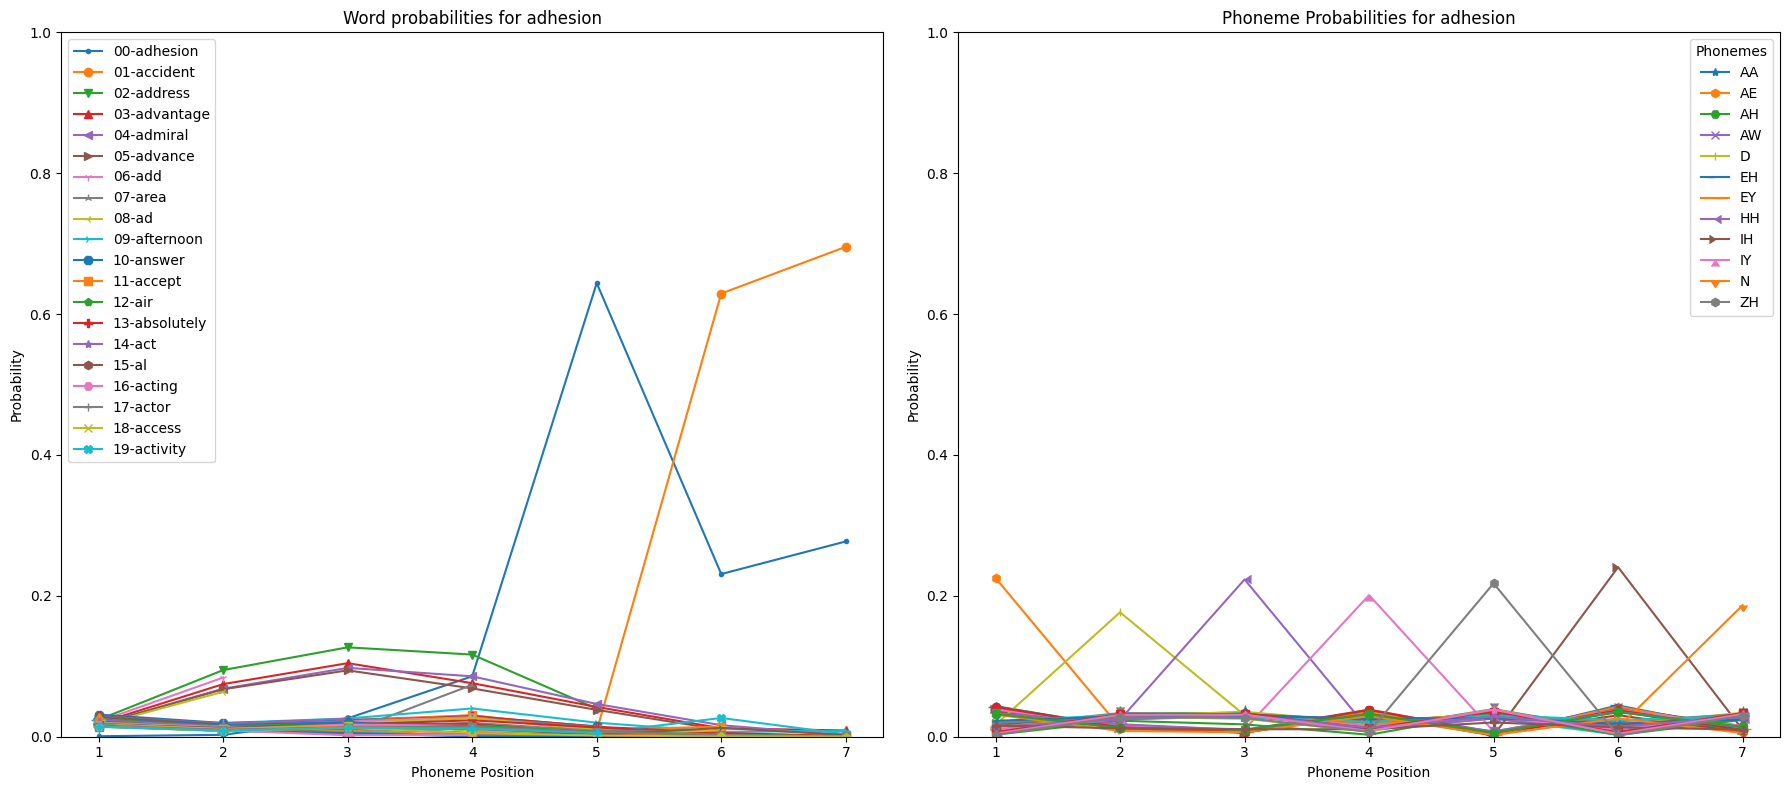

In [27]:
# Submitted by Jacob Johnson

import random
# Extract the "Item" column as a list of words
lexicon_words = lexicon_df['Item'].tolist()
# Use random.sample to select random keys
# Can change the # after the comma to select the desired sample size
word_list = random.sample(lexicon_words, 8)
aggregated_word_results, aggregated_phoneme_results = run_simulations(word_list, 
lexicon_df, normalized_cosine_sim_df, phoneme_prob_dict)
plot_simulation_result(aggregated_word_results, aggregated_phoneme_results, full_scale=True)
